In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
glob.glob('*.csv')

['part-00001-66739626-5be0-48a0-84d8-f5f9f1ee32b0-c000.csv',
 'part-00000-66739626-5be0-48a0-84d8-f5f9f1ee32b0-c000.csv',
 'part-00003-66739626-5be0-48a0-84d8-f5f9f1ee32b0-c000.csv',
 'part-00002-66739626-5be0-48a0-84d8-f5f9f1ee32b0-c000.csv',
 'part-00005-66739626-5be0-48a0-84d8-f5f9f1ee32b0-c000.csv',
 'part-00009-66739626-5be0-48a0-84d8-f5f9f1ee32b0-c000.csv',
 'part-00004-66739626-5be0-48a0-84d8-f5f9f1ee32b0-c000.csv',
 'data_01_refined_rd.csv',
 'part-00008-66739626-5be0-48a0-84d8-f5f9f1ee32b0-c000.csv',
 'outer_0_gt10.csv',
 'part-00007-66739626-5be0-48a0-84d8-f5f9f1ee32b0-c000.csv',
 'data_01_group.csv',
 'data_02_refined_rd.csv',
 'part-00006-66739626-5be0-48a0-84d8-f5f9f1ee32b0-c000.csv']

---

# # data loading

In [3]:
data_01_refined_rd = pd.read_csv('data_01_refined_rd.csv')

In [4]:
data_01_refined_rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11442152 entries, 0 to 11442151
Data columns (total 6 columns):
Unnamed: 0    int64
m_id          int64
reg_time      object
text          object
s             int64
age           int64
dtypes: int64(4), object(2)
memory usage: 523.8+ MB


In [5]:
data_01_refined_rd.head()

,Unnamed: 0,m_id,reg_time,text,s,age
0,0,22992096,2019-01-01 00:00:00+09:00,별풍선교환권,2,40
1,1,2676858,2019-01-01 00:00:00+09:00,반지,2,36
2,2,13590591,2019-01-01 00:00:01+09:00,햇살팜고구마,0,57
3,3,5708531,2019-01-01 00:00:01+09:00,사가폭스 트리밍,2,38
4,4,15378837,2019-01-01 00:00:01+09:00,와인저장,2,26


---

In [6]:
data_02_refined_rd = pd.read_csv('data_02_refined_rd.csv')

In [7]:
data_02_refined_rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10711189 entries, 0 to 10711188
Data columns (total 6 columns):
Unnamed: 0    int64
m_id          int64
reg_time      object
text          object
s             int64
age           int64
dtypes: int64(4), object(2)
memory usage: 490.3+ MB


In [8]:
data_02_refined_rd.head()

,Unnamed: 0,m_id,reg_time,text,s,age
0,0,17720334,2019-01-08 00:00:00+09:00,도라지차,2,24
1,1,25245654,2019-01-08 00:00:00+09:00,거실 매트,2,40
2,2,26696076,2019-01-08 00:00:00+09:00,생수,0,31
3,3,3256159,2019-01-08 00:00:00+09:00,사봉,1,27
4,4,4200961,2019-01-08 00:00:00+09:00,커피믹스,0,41


---

## [정보 정리] : s==0 (성별x), s==1 (남성), s==2(여성)

---

## => 지금부터, (여성) 의 데이터만 살핀다!

In [9]:
data_01_refined_rd = data_01_refined_rd[data_01_refined_rd.s == 2].copy()

In [10]:
data_02_refined_rd = data_02_refined_rd[data_02_refined_rd.s == 2].copy()

In [11]:
data_01_refined_rd.shape

(7506701, 6)

In [12]:
data_02_refined_rd.shape

(7125610, 6)

---

## # (*star) age_range :  category 연령 변수 만들어준다!

In [13]:
bins = [0, 20, 25, 30, 35, 40, 50, 60, np.inf]
names = ['<20', '20-25', '25-30', '30-35', '35-40', '40-50', '50-60', '60+']


In [14]:
data_01_refined_rd['age_range'] = pd.cut(data_01_refined_rd['age'], bins, labels=names, right=False)

In [15]:
data_01_refined_rd[data_01_refined_rd.age > 60].sort_values(by='age', ascending=False).head()

,Unnamed: 0,m_id,reg_time,text,s,age,age_range
6962858,6962858,25242121,2019-01-05 03:17:53+09:00,OPP접착봉투,2,110,60+
9953000,9953000,25242121,2019-01-07 02:42:00+09:00,밴드,2,110,60+
6947949,6947949,25242121,2019-01-05 02:44:49+09:00,어린이집 생일선물,2,110,60+
6892403,6892403,25242121,2019-01-05 01:29:06+09:00,어린이집 생일선물,2,110,60+
6940316,6940316,25242121,2019-01-05 02:30:57+09:00,스카프,2,110,60+


In [16]:
data_01_refined_rd.info() ## cagtegory value된 것 확인한다!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7506701 entries, 0 to 11442151
Data columns (total 7 columns):
Unnamed: 0    int64
m_id          int64
reg_time      object
text          object
s             int64
age           int64
age_range     category
dtypes: category(1), int64(4), object(2)
memory usage: 408.1+ MB


In [17]:
## 2주차도

data_02_refined_rd['age_range'] = pd.cut(data_02_refined_rd['age'], bins, labels=names, right=False)

In [18]:
data_02_refined_rd.head()

,Unnamed: 0,m_id,reg_time,text,s,age,age_range
0,0,17720334,2019-01-08 00:00:00+09:00,도라지차,2,24,20-25
1,1,25245654,2019-01-08 00:00:00+09:00,거실 매트,2,40,40-50
7,7,2891177,2019-01-08 00:00:00+09:00,반팔티셔츠,2,36,35-40
8,8,2451306,2019-01-08 00:00:00+09:00,신생아바디슈트,2,25,25-30
10,10,7778633,2019-01-08 00:00:00+09:00,견미리팩트,2,28,25-30


---

# 1. 여성들의 연령별 검색 규모

### # *1주차*

In [547]:
data_01_refined_rd.groupby('age_range')[['m_id']].count()

,m_id
age_range,
<20,404330
20-25,967739
25-30,1071553
30-35,1326235
35-40,1769815
40-50,1472497
50-60,394294
60+,100238


### # 2주차

In [548]:
data_02_refined_rd.groupby('age_range')[['m_id']].count()

,m_id
age_range,
<20,425032
20-25,937802
25-30,1005325
30-35,1226051
35-40,1650797
40-50,1409594
50-60,379575
60+,91434


---

# 2. 주차별 연령대의 count, top 검색어(비율도)

### # *1주차*

In [476]:
data_01_refined_rd.groupby('age_range').text.describe().sort_values('count', ascending=False)

,count,unique,top,freq
age_range,,,,
35-40,1769815,234932,물티슈,6857
40-50,1472497,212360,물티슈,3857
30-35,1326235,196756,물티슈,5076
25-30,1071553,169923,11데이,3989
20-25,967739,142847,에어팟,5660
<20,404330,72543,아이폰 케이스,3134
50-60,394294,84969,11데이,1218
60+,100238,33036,11데이,468


### # 2주차 

In [479]:
data_02_refined_rd.groupby('age_range').text.describe().sort_values('count', ascending=False)

,count,unique,top,freq
age_range,,,,
35-40,1650797,226023,물티슈,6212
40-50,1409594,207532,물티슈,3429
30-35,1226051,188419,물티슈,4228
25-30,1005325,163695,물티슈,2621
20-25,937802,140475,에어팟,4597
<20,425032,75001,귀걸이,3309
50-60,379575,82583,에어프라이어,1363
60+,91434,30907,사과,287


---

# 3. 주차별 연령대 비율 달라졌을까?

### # 1주차

In [47]:
data_01_refined_rd.groupby('age_range')[['m_id']].count().sort_values('m_id', ascending=False)

,m_id
age_range,
35-40,1769815
40-50,1472497
30-35,1326235
25-30,1071553
20-25,967739
<20,404330
50-60,394294
60+,100238


#### # <u>비율로서 나타내볼게!

In [52]:
data_01_refined_rd.groupby('age_range')[['m_id']].count().sort_values('m_id', ascending=False)\
                        .apply(lambda x: x/sum(x))

,m_id
age_range,
35-40,0.235765
40-50,0.196158
30-35,0.176673
25-30,0.142746
20-25,0.128917
<20,0.053863
50-60,0.052526
60+,0.013353


### # *2주차*

In [475]:
data_02_refined_rd.groupby('age_range')[['m_id']].count().sort_values(by='m_id', ascending=False)

,m_id
age_range,
35-40,1650797
40-50,1409594
30-35,1226051
25-30,1005325
20-25,937802
<20,425032
50-60,379575
60+,91434


In [58]:
data_02_refined_rd.groupby('age_range')[['m_id']].count()\
                .apply(lambda x: x/sum(x)).sort_values(by='m_id', ascending=False)

,m_id
age_range,
35-40,0.231671
40-50,0.197821
30-35,0.172063
25-30,0.141086
20-25,0.131610
<20,0.059649
50-60,0.053269
60+,0.012832


<u><결론> - ## 여성 연령별 비율 거의 달라진거 없다!

---

---

# 4. 1월 1주 / 2주 검색기록 살피기

### # 1주차 text들의 빈도 살피기

In [15]:
## 1주차

data_01_refined_rd.text.value_counts()

11데이           23039
물티슈            21083
양말             13118
에어팟            13001
귀걸이            12654
생수             12623
에어프라이어         11705
해피머니           10569
귤              10474
다이어리           10185
롯데월드           10054
닭가슴살            9762
생리대             9703
아이폰 케이스         9350
핫팩              9214
원피스             9106
샴푸              9103
다우니             9048
휴지              8678
가습기             8504
베베숲             8420
위메프 포인트         8182
다이어트            8087
제주도 항공권         7809
가방              7666
고구마             7400
기저귀             7268
화장지             7228
햇반              7007
운동화             6853
               ...  
오피스커피              1
uhd43r             1
11데이 순면 손수건        1
애슬리                1
넹리                 1
클라쎄 김치             1
세제몰                1
졸피뎀                1
타미힐피커 모자           1
유아헤어핀 11데이         1
남자미스트              1
소프트쉘 크랩            1
마약발팩               1
뮤슬리                1
커플 겨울              1
부릉부릉               1
유키두 달팽이      

In [395]:
## 1주차 search 빈도 표 만들자.

text_01 = pd.DataFrame({
    'text' : data_01_refined_rd.text.value_counts().index.values.tolist(),
    'counts' : data_01_refined_rd.text.value_counts().values.tolist()     })

In [396]:
text_01.head()

,text,counts
0,11데이,23039
1,물티슈,21083
2,양말,13118
3,에어팟,13001
4,귀걸이,12654


In [397]:
text_01['rank'] = text_01['counts'].rank(ascending=0, method = 'min') # 'method=min' 이렇게 하는게 맞아~

In [399]:
text_01.tail()

,text,counts,rank
489185,대형 포스터,1,408848.0
489186,엠지택,1,408848.0
489187,제주안심,1,408848.0
489188,티오피라떼,1,408848.0
489189,스포츠 팬츠,1,408848.0


### # bar plot을 그려볼까?

In [63]:
from matplotlib import rc, font_manager


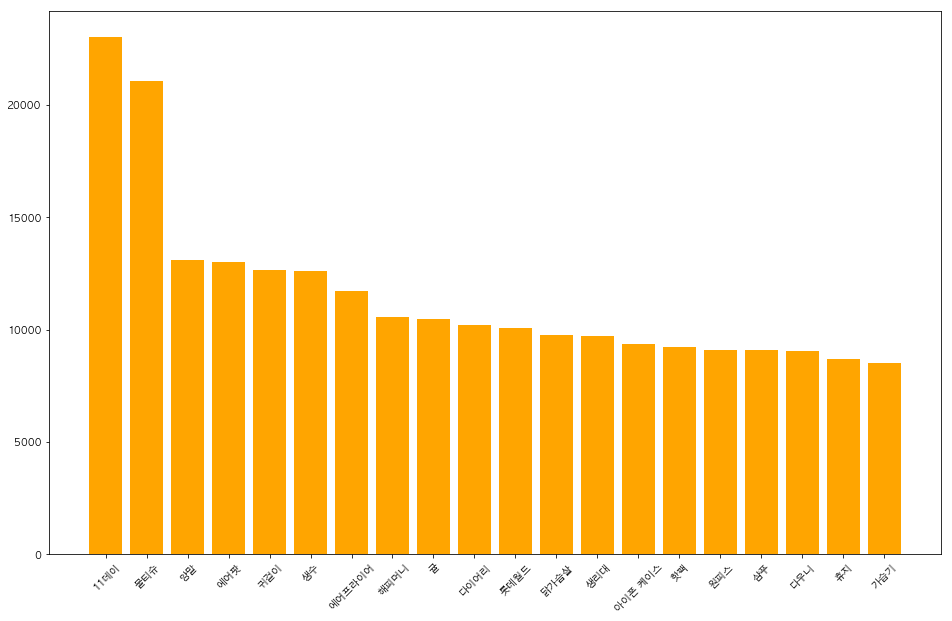

In [551]:
rc('font', family = 'AppleGothic')


plt.figure(figsize = (16, 10))
plt.bar( text_01[:20].text.values, text_01[:20].counts.values, color='orange')
plt.xticks(rotation=45)

plt.show()

In [65]:
text_01[:20].text.values

array(['11데이', '물티슈', '양말', '에어팟', '귀걸이', '생수', '에어프라이어', '해피머니', '귤',
       '다이어리', '롯데월드', '닭가슴살', '생리대', '아이폰 케이스', '핫팩', '원피스', '샴푸', '다우니',
       '휴지', '가습기'], dtype=object)

---

### # 2주차 text들의 빈도 살피기

In [27]:
## 2주차

data_02_refined_rd.text.value_counts()

물티슈              18601
11데이             12797
귀걸이              12780
에어프라이어           12519
양말               11636
생수               10926
에어팟              10722
롯데월드             10481
귤                 9919
닭가슴살              9712
아이폰 케이스           9468
마스크               9460
원피스               9439
생리대               9196
해피머니              8854
샴푸                8149
휴지                8065
다우니               7907
제주도 항공권           7821
다이어트              7728
가방                7675
베베숲               7191
화장지               6865
운동화               6832
이디야               6807
기저귀               6655
위메프 포인트           6561
이니스프리             6553
가습기               6542
캐리어               6391
                 ...  
코다노 치즈               1
인덕션 받침               1
고터 맛집                1
지맥스                  1
이천쌀20k               1
캠리악력기                1
임금님표 이천쌀 10kg        1
라코스테 여성신발            1
치안ㄱ                  1
전기스탠드                1
이사박                  1
위닉스환기                1
쿠키앤크림맛 유산균 

In [400]:
## 2주차 search 빈도 표 만들자.


text_02 = pd.DataFrame({
    'text' : data_02_refined_rd.text.value_counts().index.values.tolist(),
    'counts' : data_02_refined_rd.text.value_counts().values.tolist()     })

In [401]:
text_02.head()

,text,counts
0,물티슈,18601
1,11데이,12797
2,귀걸이,12780
3,에어프라이어,12519
4,양말,11636


In [402]:
text_02['rank'] = text_02['counts'].rank(ascending=0, method = 'min')

In [403]:
text_02.tail()

,text,counts,rank
476014,코시차량용충전기,1,399346.0
476015,구로 렌트카,1,399346.0
476016,판넬형 보석십자수,1,399346.0
476017,신타6 콜드스톤,1,399346.0
476018,수도잠금장치,1,399346.0


---

## # 여성들의 두번째주 total연령 검색분포 살펴볼게!

In [586]:
text_01.text[:20]

0        11데이
1         물티슈
2          양말
3         에어팟
4         귀걸이
5          생수
6      에어프라이어
7        해피머니
8           귤
9        다이어리
10       롯데월드
11       닭가슴살
12        생리대
13    아이폰 케이스
14         핫팩
15        원피스
16         샴푸
17        다우니
18         휴지
19        가습기
Name: text, dtype: object

In [597]:
color_type = [i for i, x in enumerate(text_02[:20].text.isin(text_01.text[:20]).tolist()) if x==0]

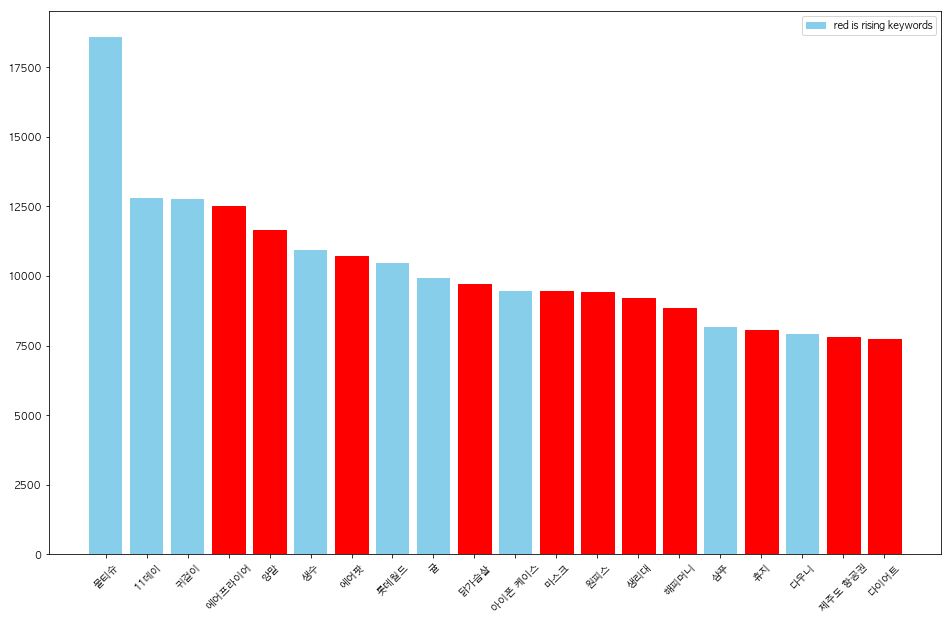

In [630]:
# 빨간색인 이번주에 20위로 상승한 검색어!

rc('font', family = 'AppleGothic')


plt.figure(figsize = (16, 10))

barlist = plt.bar( text_02[:20].text.values, text_02[:20].counts.values, color='skyblue', label = 'red is rising keywords')
for i in range(len(color_type)):
    barlist[color_type[i]].set_color('r')
#barlist[[i for i, x in enumerate(text_02[:20].text.isin(text_01.text[:20]).tolist()) if x==0]].set_color('r')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [70]:
data_02_refined_rd.head()

,Unnamed: 0,m_id,reg_time,text,s,age,age_range
0,0,17720334,2019-01-08 00:00:00+09:00,도라지차,2,24,20-25
1,1,25245654,2019-01-08 00:00:00+09:00,거실 매트,2,40,40-50
7,7,2891177,2019-01-08 00:00:00+09:00,반팔티셔츠,2,36,35-40
8,8,2451306,2019-01-08 00:00:00+09:00,신생아바디슈트,2,25,25-30
10,10,7778633,2019-01-08 00:00:00+09:00,견미리팩트,2,28,25-30


---

# 5. Top 20위의 분포 시각화

### # data_reduce - 'data_01_refined_rd_20' / 'data_02_refined_rd_20' 
:<u> 상위 20위의 text key-word 데이터 만으로 이루어진 것(효율을 위해 변수 : [text, age_range] 2개뿐)

1주차

In [71]:
data_01_refined_rd_20 = data_01_refined_rd[ data_01_refined_rd.text.isin( text_01[:20].text.values ) ][['text', 'age_range']]



In [72]:
data_01_refined_rd_20.head()

,text,age_range
16,11데이,20-25
17,11데이,20-25
30,11데이,30-35
59,11데이,35-40
80,11데이,30-35


2주차

In [73]:
text_02[:20].text.values

array(['물티슈', '11데이', '귀걸이', '에어프라이어', '양말', '생수', '에어팟', '롯데월드', '귤',
       '닭가슴살', '아이폰 케이스', '마스크', '원피스', '생리대', '해피머니', '샴푸', '휴지', '다우니',
       '제주도 항공권', '다이어트'], dtype=object)

In [74]:
data_02_refined_rd_20 = data_02_refined_rd[ data_02_refined_rd.text.isin( text_02[:20].text.values ) ][['text', 'age_range']]



In [75]:
data_01_refined_rd_20.head()

,text,age_range
16,11데이,20-25
17,11데이,20-25
30,11데이,30-35
59,11데이,35-40
80,11데이,30-35


---

---

## 5.1 # <u>"1주차" top20위 키워드의 '연령별 분포!'</u> ( 2주차는 고려안한거야!)

; <u>top20 순서대로 plotting 해볼게!

In [77]:
import seaborn as sns

In [81]:
data_01_refined_rd_20.head(10)

,text,age_range
16,11데이,20-25
17,11데이,20-25
30,11데이,30-35
59,11데이,35-40
80,11데이,30-35
86,물티슈,35-40
97,해피머니,35-40
98,11데이,30-35
118,물티슈,30-35
218,에어프라이어,30-35


In [85]:
data_ = data_01_refined_rd_20.groupby('text').count().sort_values('age_range', ascending=False)

In [86]:
data_

,age_range
text,
11데이,23039
물티슈,21083
양말,13118
에어팟,13001
귀걸이,12654
생수,12623
에어프라이어,11705
해피머니,10569
귤,10474


In [92]:
data_ = data_.reset_index()

In [93]:
data_

,text,age_range
0,11데이,23039
1,물티슈,21083
2,양말,13118
3,에어팟,13001
4,귀걸이,12654
5,생수,12623
6,에어프라이어,11705
7,해피머니,10569
8,귤,10474
9,다이어리,10185


In [97]:
data_01_refined_rd_20.shape

(230973, 2)

In [98]:
# 데이터 손실없이 합쳐졌네.
data_01_refined_rd_20 = pd.merge(data_01_refined_rd_20, data_, on='text')

In [101]:
data_01_refined_rd_20.sort_values('age_range_y', ascending=False, inplace=True)

In [102]:
data_01_refined_rd_20.head()

,text,age_range_x,age_range_y
0,11데이,20-25,23039
15367,11데이,25-30,23039
15365,11데이,40-50,23039
15364,11데이,25-30,23039
15363,11데이,30-35,23039


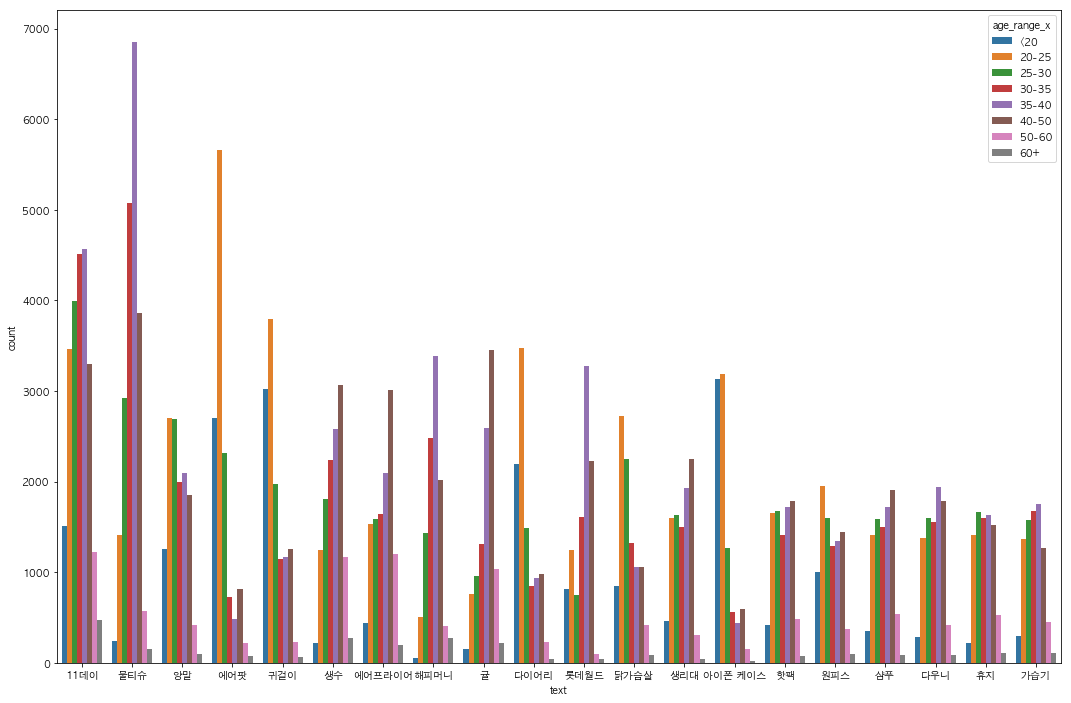

In [106]:
plt.figure(figsize=(18,12))
sns.countplot(x="text", hue="age_range_x" , data=data_01_refined_rd_20.drop('age_range_y', axis=1))
plt.show()

---

In [107]:
data_01_refined_rd_20.head()

,text,age_range_x,age_range_y
0,11데이,20-25,23039
15367,11데이,25-30,23039
15365,11데이,40-50,23039
15364,11데이,25-30,23039
15363,11데이,30-35,23039


## # 1주차 데이터에서  상위 20개의 키워드를 ['age_range', 'text']로 groupby 한 후, m_id를 count.

In [109]:
data_01_refined_rd[ data_01_refined_rd.text.isin( text_01[:20].text.values ) ]\
    .groupby(['age_range', 'text'])[['m_id']].count()

m_id
age_range text         
<20       11데이     1515
          가습기       300
          귀걸이      3021
          귤         154
          다우니       281
          다이어리     2194
          닭가슴살      851
          롯데월드      817
          물티슈       245
          생리대       463
          생수        224
          샴푸        347
          아이폰 케이스  3134
          양말       1252
          에어팟      2705
          에어프라이어    443
          원피스       999
          핫팩        420
          해피머니       50
          휴지        219
20-25     11데이     3468
          가습기      1369
          귀걸이      3796
          귤         758
          다우니      1382
          다이어리     3476
          닭가슴살     2724
          롯데월드     1244
          물티슈      1406
          생리대      1596
...                 ...
50-60     생수       1170
          샴푸        535
          아이폰 케이스   148
          양말        422
          에어팟       224
          에어프라이어   1199
          원피스       376
          핫팩        483
          해피머니      410
          휴지        527
60+       11데이      468
          가습기       105
          귀걸이        66
          귤         217
          다우니        83
          다이어리       39
          닭가슴살       88
          롯데월드       41
          물티슈       147
          생리대        37
          생수        277
          샴푸         88
          아이폰 케이스    23
          양말         92
          에어팟        72
          에어프라이어    192
          원피스        99
          핫팩         71
          해피머니      276
          휴지        104

[160 rows x 1 columns]

In [110]:
# 위의 결과를 dd 에 저장한거야
dd = data_01_refined_rd[ data_01_refined_rd.text.isin( text_01[:20].text.values ) ]\
    .groupby(['age_range', 'text']).m_id.count()



In [111]:
dd.unstack()

text,11데이,가습기,귀걸이,귤,다우니,다이어리,닭가슴살,롯데월드,물티슈,생리대,생수,샴푸,아이폰 케이스,양말,에어팟,에어프라이어,원피스,핫팩,해피머니,휴지
age_range,,,,,,,,,,,,,,,,,,,,
<20,1515,300,3021,154,281,2194,851,817,245,463,224,347,3134,1252,2705,443,999,420,50,219
20-25,3468,1369,3796,758,1382,3476,2724,1244,1406,1596,1246,1416,3193,2705,5660,1536,1952,1654,505,1412
25-30,3989,1581,1977,963,1601,1486,2248,749,2926,1626,1811,1589,1263,2696,2317,1588,1601,1674,1434,1664
30-35,4512,1677,1151,1315,1558,845,1324,1606,5076,1499,2242,1500,560,2001,722,1644,1292,1407,2485,1600
35-40,4569,1755,1163,2588,1942,940,1061,3275,6857,1928,2586,1724,434,2093,484,2091,1347,1717,3386,1626
40-50,3300,1268,1251,3448,1785,979,1054,2224,3857,2248,3067,1904,595,1857,817,3012,1440,1788,2023,1526
50-60,1218,449,229,1031,416,226,412,98,569,306,1170,535,148,422,224,1199,376,483,410,527
60+,468,105,66,217,83,39,88,41,147,37,277,88,23,92,72,192,99,71,276,104


In [114]:
dd = dd.unstack().transpose()

In [115]:
dd

age_range,<20,20-25,25-30,30-35,35-40,40-50,50-60,60+
text,,,,,,,,
11데이,1515,3468,3989,4512,4569,3300,1218,468
가습기,300,1369,1581,1677,1755,1268,449,105
귀걸이,3021,3796,1977,1151,1163,1251,229,66
귤,154,758,963,1315,2588,3448,1031,217
다우니,281,1382,1601,1558,1942,1785,416,83
다이어리,2194,3476,1486,845,940,979,226,39
닭가슴살,851,2724,2248,1324,1061,1054,412,88
롯데월드,817,1244,749,1606,3275,2224,98,41
물티슈,245,1406,2926,5076,6857,3857,569,147


## # sum변수 추가시켜서, 큰 순서대로 sorting 시켜볼게

In [119]:
dd.sum(axis=1)

text
11데이       23039
가습기         8504
귀걸이        12654
귤          10474
다우니         9048
다이어리       10185
닭가슴살        9762
롯데월드       10054
물티슈        21083
생리대         9703
생수         12623
샴푸          9103
아이폰 케이스     9350
양말         13118
에어팟        13001
에어프라이어     11705
원피스         9106
핫팩          9214
해피머니       10569
휴지          8678
dtype: int64

In [127]:
pd.DataFrame({'sum_':dd.sum(axis=1)})

,sum_
text,
11데이,23039
가습기,8504
귀걸이,12654
귤,10474
다우니,9048
다이어리,10185
닭가슴살,9762
롯데월드,10054
물티슈,21083


In [128]:
pd.merge(pd.DataFrame({'sum_':dd.sum(axis=1)}), dd, right_index=True, left_on='text') # 이렇게 하면 오류 안난다!

# 참고 : https://stackoverflow.com/questions/34901708/typeerror-cannot-append-a-non-category-item-to-a-categoricalindex

,sum_,<20,20-25,25-30,30-35,35-40,40-50,50-60,60+
text,,,,,,,,,
11데이,23039,1515,3468,3989,4512,4569,3300,1218,468
가습기,8504,300,1369,1581,1677,1755,1268,449,105
귀걸이,12654,3021,3796,1977,1151,1163,1251,229,66
귤,10474,154,758,963,1315,2588,3448,1031,217
다우니,9048,281,1382,1601,1558,1942,1785,416,83
다이어리,10185,2194,3476,1486,845,940,979,226,39
닭가슴살,9762,851,2724,2248,1324,1061,1054,412,88
롯데월드,10054,817,1244,749,1606,3275,2224,98,41
물티슈,21083,245,1406,2926,5076,6857,3857,569,147


### # 이부분 중요!!

In [129]:
dd_ = pd.merge(pd.DataFrame({'sum_':dd.sum(axis=1)}), dd, right_index=True, left_on='text')

In [130]:
dd_.sort_values(by='sum_', ascending=False, inplace=True)

In [131]:
dd_

,sum_,<20,20-25,25-30,30-35,35-40,40-50,50-60,60+
text,,,,,,,,,
11데이,23039,1515,3468,3989,4512,4569,3300,1218,468
물티슈,21083,245,1406,2926,5076,6857,3857,569,147
양말,13118,1252,2705,2696,2001,2093,1857,422,92
에어팟,13001,2705,5660,2317,722,484,817,224,72
귀걸이,12654,3021,3796,1977,1151,1163,1251,229,66
생수,12623,224,1246,1811,2242,2586,3067,1170,277
에어프라이어,11705,443,1536,1588,1644,2091,3012,1199,192
해피머니,10569,50,505,1434,2485,3386,2023,410,276
귤,10474,154,758,963,1315,2588,3448,1031,217


---

## # " 데이터:dd_ " 에서 'sum_' 을 없애고,  " 데이터:ridi " 로 받아주자

In [137]:
ridi = dd_.drop('sum_', axis=1).copy()

In [138]:
ridi

,<20,20-25,25-30,30-35,35-40,40-50,50-60,60+
text,,,,,,,,
11데이,1515,3468,3989,4512,4569,3300,1218,468
물티슈,245,1406,2926,5076,6857,3857,569,147
양말,1252,2705,2696,2001,2093,1857,422,92
에어팟,2705,5660,2317,722,484,817,224,72
귀걸이,3021,3796,1977,1151,1163,1251,229,66
생수,224,1246,1811,2242,2586,3067,1170,277
에어프라이어,443,1536,1588,1644,2091,3012,1199,192
해피머니,50,505,1434,2485,3386,2023,410,276
귤,154,758,963,1315,2588,3448,1031,217


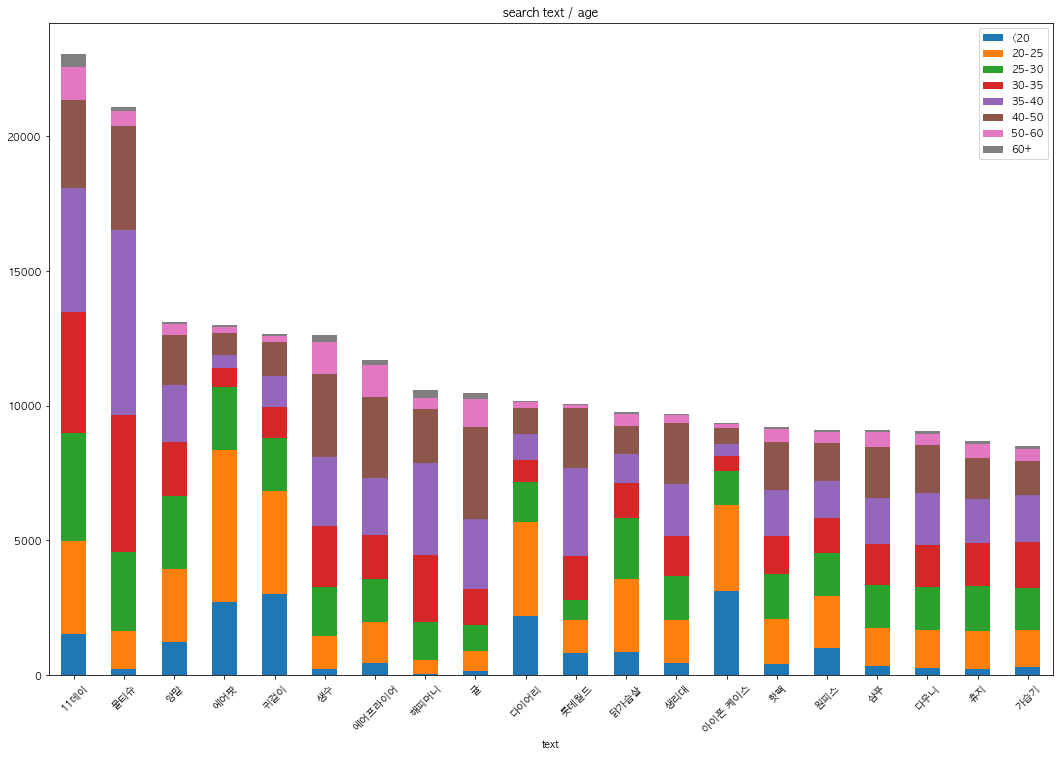

In [554]:
ridi.plot(kind='bar',stacked=True ,figsize=(18, 12),title='search text / age')
plt.xticks(rotation=45)
plt.show()

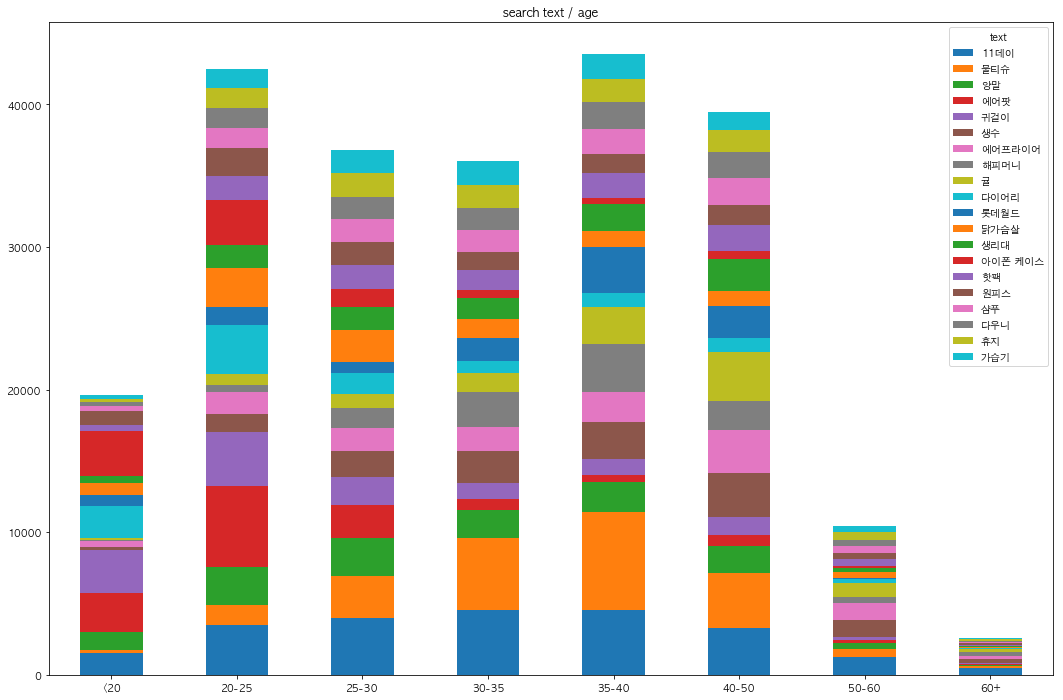

In [557]:
ridi.transpose().plot(kind='bar',stacked=True ,figsize=(18, 12),title='search text / age')
plt.xticks(rotation=0)
plt.show()

---

## # 이렇게 보는건, 연령별 규모면 때문에 별로일 수 있다.

In [143]:
# 연령별 - ridi.transpose()

ridi.transpose()

text,11데이,물티슈,양말,에어팟,귀걸이,생수,에어프라이어,해피머니,귤,다이어리,롯데월드,닭가슴살,생리대,아이폰 케이스,핫팩,원피스,샴푸,다우니,휴지,가습기
<20,1515,245,1252,2705,3021,224,443,50,154,2194,817,851,463,3134,420,999,347,281,219,300
20-25,3468,1406,2705,5660,3796,1246,1536,505,758,3476,1244,2724,1596,3193,1654,1952,1416,1382,1412,1369
25-30,3989,2926,2696,2317,1977,1811,1588,1434,963,1486,749,2248,1626,1263,1674,1601,1589,1601,1664,1581
30-35,4512,5076,2001,722,1151,2242,1644,2485,1315,845,1606,1324,1499,560,1407,1292,1500,1558,1600,1677
35-40,4569,6857,2093,484,1163,2586,2091,3386,2588,940,3275,1061,1928,434,1717,1347,1724,1942,1626,1755
40-50,3300,3857,1857,817,1251,3067,3012,2023,3448,979,2224,1054,2248,595,1788,1440,1904,1785,1526,1268
50-60,1218,569,422,224,229,1170,1199,410,1031,226,98,412,306,148,483,376,535,416,527,449
60+,468,147,92,72,66,277,192,276,217,39,41,88,37,23,71,99,88,83,104,105


In [142]:
# 품목별 - ridi

ridi

,<20,20-25,25-30,30-35,35-40,40-50,50-60,60+
text,,,,,,,,
11데이,1515,3468,3989,4512,4569,3300,1218,468
물티슈,245,1406,2926,5076,6857,3857,569,147
양말,1252,2705,2696,2001,2093,1857,422,92
에어팟,2705,5660,2317,722,484,817,224,72
귀걸이,3021,3796,1977,1151,1163,1251,229,66
생수,224,1246,1811,2242,2586,3067,1170,277
에어프라이어,443,1536,1588,1644,2091,3012,1199,192
해피머니,50,505,1434,2485,3386,2023,410,276
귤,154,758,963,1315,2588,3448,1031,217


# # <u>연령별 품목 비율 따지기 좋다!!!

### text_01[:20] 의 결과!
['11데이', '물티슈', '양말', '에어팟', '귀걸이', '생수', '에어프라이어', '해피머니', '귤',
       '다이어리', '롯데월드', '닭가슴살', '생리대', '아이폰 케이스', '핫팩', '원피스', '샴푸', '다우니',
       '휴지', '가습기']

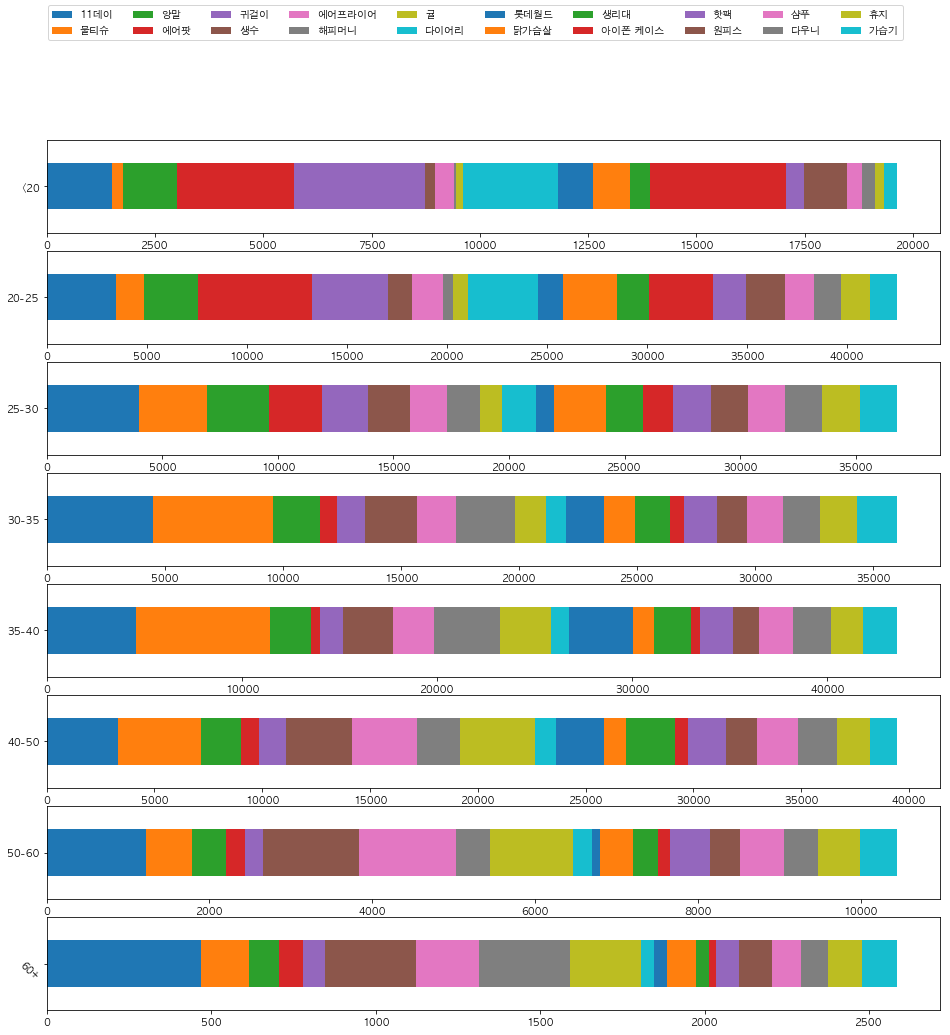

In [563]:
# 연령별 - using ridi.transpose()
fig, axes = plt.subplots(8,1, figsize=(16,16))

for i in range(8):
    axes[i].set_yticklabels([])

    ridi.transpose()[i:i+1].plot(kind='barh',stacked=True  , ax=axes[i], legend=False)

        
plt.figlegend(labels = ridi.transpose().columns.values.tolist(), loc = 'upper center', ncol=10, labelspacing=0.5 )
plt.yticks(rotation=315)
plt.show()

In [147]:
ridi

,<20,20-25,25-30,30-35,35-40,40-50,50-60,60+
text,,,,,,,,
11데이,1515,3468,3989,4512,4569,3300,1218,468
물티슈,245,1406,2926,5076,6857,3857,569,147
양말,1252,2705,2696,2001,2093,1857,422,92
에어팟,2705,5660,2317,722,484,817,224,72
귀걸이,3021,3796,1977,1151,1163,1251,229,66
생수,224,1246,1811,2242,2586,3067,1170,277
에어프라이어,443,1536,1588,1644,2091,3012,1199,192
해피머니,50,505,1434,2485,3386,2023,410,276
귤,154,758,963,1315,2588,3448,1031,217


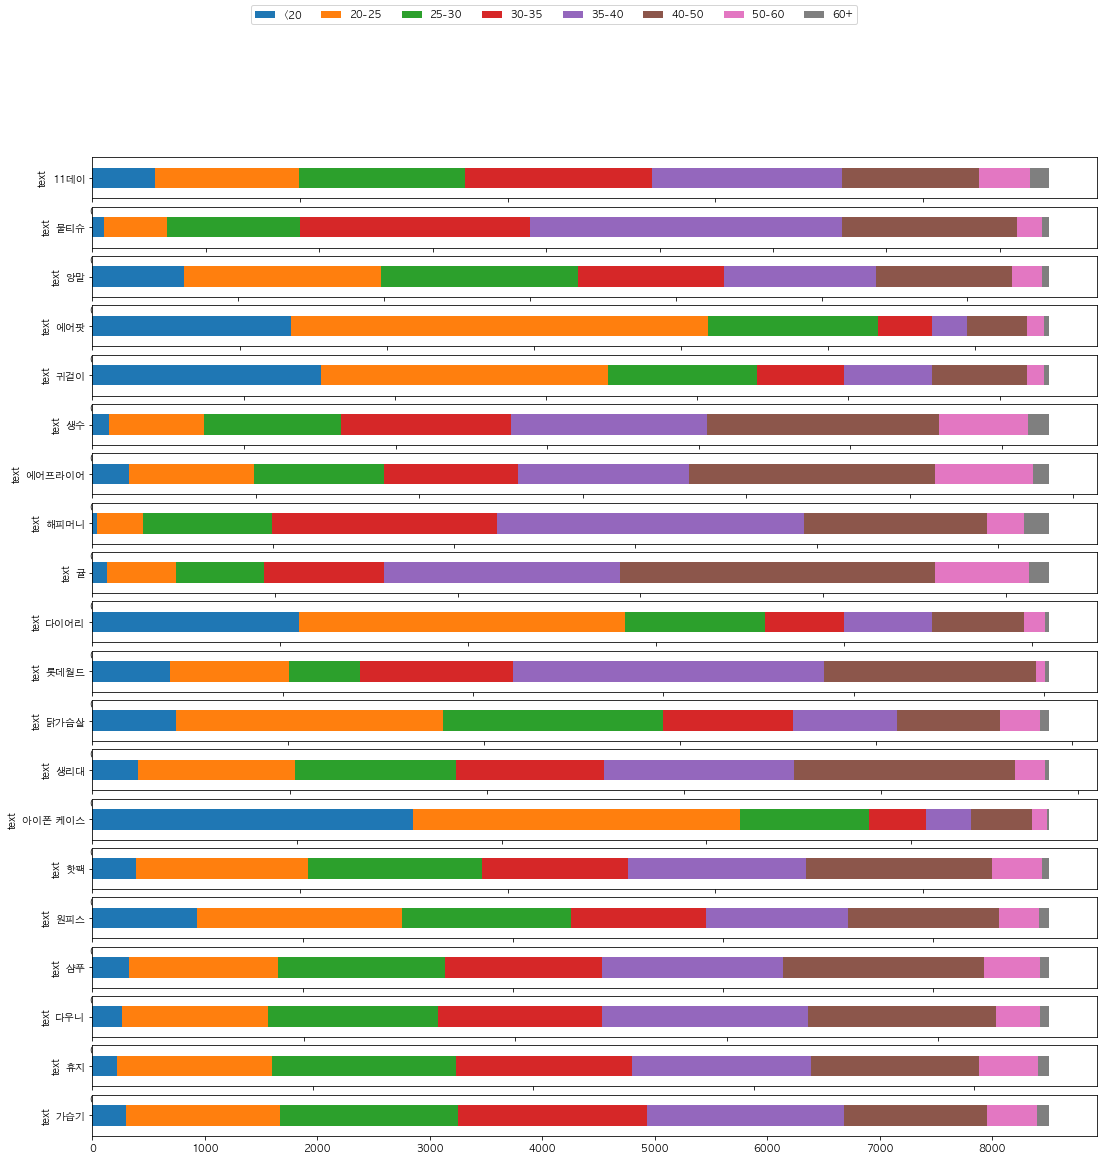

In [148]:
fig, axes = plt.subplots(20,1, figsize=(18,18))

for i in range(20):
    axes[i].set_yticklabels([])
    #axes[i].legend(loc="upper center", ncol=10)  
    ridi[i:i+1].plot(kind='barh',stacked=True  , ax=axes[i], legend=False)

    
plt.figlegend(labels=['<20', '20-25', '25-30', '30-35', '35-40', '40-50', '50-60',
                  '60+'], loc = 'upper center', ncol=8, labelspacing=0.5 )
plt.show()

---

# 6. # 연령별로 Top20 / 변동 큰 keywords

: <u>이전에는 공통 20위에 대한 연령별 분포였고, 지금은 연령별로 각기 다른 top20

### # <u>(1) 20세 미만

#### - 20 미만 데이터에 대해서 살펴보자

In [165]:
## 1주차 search 빈도 표 만들자.

text_01_20 = pd.DataFrame({
    'text' : data_01_refined_rd[data_01_refined_rd.age_range == '<20'].text.value_counts().index.values.tolist(),
    'counts' : data_01_refined_rd[data_01_refined_rd.age_range == '<20'].text.value_counts().values.tolist()     })



In [166]:
# rank 세울때 동점자는 같은순위로!

text_01_20['rank'] = text_01_20['counts'].rank(ascending=0, method = 'min') # 이렇게 하는게 맞아~

In [168]:
text_01_20.tail()

,text,counts,rank
72538,자석 피어싱,1,35414.0
72539,밍크융털,1,35414.0
72540,지갑핸드폰케이스,1,35414.0
72541,연장후크,1,35414.0
72542,토니모리 젤 아이라이너,1,35414.0


---

In [169]:
## 2주차 search 빈도 표 만들자.

text_02_20 = pd.DataFrame({
    'text' : data_02_refined_rd[data_02_refined_rd.age_range == '<20'].text.value_counts().index.values.tolist(),
    'counts' : data_02_refined_rd[data_02_refined_rd.age_range == '<20'].text.value_counts().values.tolist()     })



In [170]:
text_02_20['rank'] = text_02_20['counts'].rank(ascending=0, method = 'min')

In [171]:
text_02_20.tail()

,text,counts,rank
74996,LG노트북15UD370-LX1TK,1,36794.0
74997,한룩,1,36794.0
74998,석탄박물관,1,36794.0
74999,이케아 벽조명,1,36794.0
75000,샌디볼귀걸이,1,36794.0


In [172]:
data_01_refined_rd_ = data_01_refined_rd[ data_01_refined_rd.text.isin( text_01_20[:20].text.values ) ]\
                        [['text', 'age_range']]

In [173]:
data_02_refined_rd_ = data_02_refined_rd[ data_02_refined_rd.text.isin( text_02_20[:20].text.values ) ]\
                        [['text', 'age_range']]

---

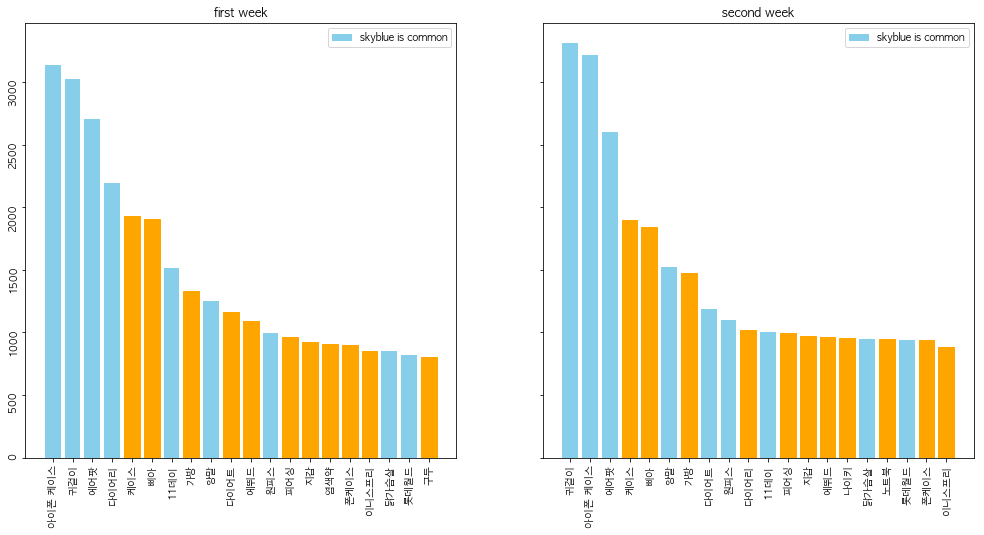

In [634]:
x[0] = text_01_20
x[1] = text_02_20
y[0] = text_01
y[1] = text_02

title = ['first week', 'second week']

fig, axes = plt.subplots(1,2, figsize = (17,8), sharey=True)

for j,ax in enumerate(axes.flatten()):
    ax.tick_params(labelrotation=90)
    ax.set_title(title[j])
    color_type = [i for i, x in enumerate( x[j].text[:20].isin(y[j].text[:20]) ) if x==0]
    
    barlist = ax.bar( x[j][:20].text, x[j][:20].counts, color='skyblue', label='skyblue is common')
            
    for i in range(len(color_type)):
        barlist[color_type[i]].set_color('orange')
    ax.legend(loc="upper right")

plt.show()

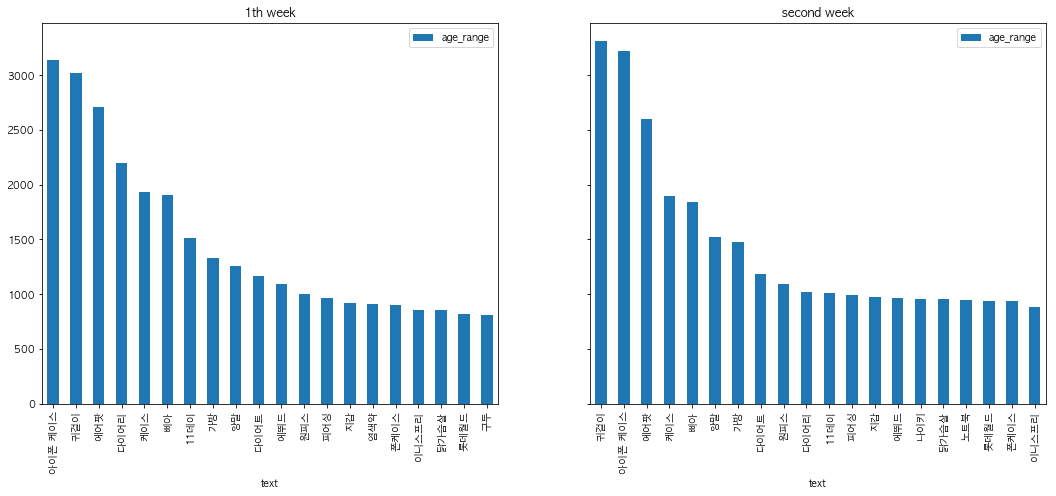

In [174]:
fig, axes = plt.subplots(1,2, figsize=(18,7), sharey=True)

data_01_refined_rd_[data_01_refined_rd_.age_range == '<20'].groupby('text').count()\
.sort_values(by='age_range', ascending=False)\
.plot(kind='bar',stacked=False , title = '1th week' , ax=axes[0])

data_02_refined_rd_[data_02_refined_rd_.age_range == '<20'].groupby('text').count()\
.sort_values(by='age_range', ascending=False)\
.plot(kind='bar',stacked=False , title='second week', ax=axes[1])

plt.show()

---

In [175]:
outer_20 = pd.merge( text_01_20, text_02_20 , on='text', how='outer')

In [176]:
outer_20 = outer_20[['text', 'rank_x', 'rank_y',  'counts_x',  'counts_y']] 

In [177]:
outer_20.head()

,text,rank_x,rank_y,counts_x,counts_y
0,아이폰 케이스,1.0,2.0,3134.0,3216.0
1,귀걸이,2.0,1.0,3021.0,3309.0
2,에어팟,3.0,3.0,2705.0,2598.0
3,다이어리,4.0,10.0,2194.0,1022.0
4,케이스,5.0,4.0,1931.0,1896.0


---

In [178]:
outer_0_20 = outer_20.copy()

In [179]:
outer_0_20.counts_x = outer_0_20.counts_x.fillna(1)

In [180]:
outer_0_20.counts_y = outer_0_20.counts_y.fillna(1)

In [181]:
text_01_20[['rank']].tail(1)

,rank
72542,35414.0


In [182]:
outer_0_20.rank_x = outer_0_20.rank_x.fillna(35414+1)

In [183]:
text_02_20[['rank']].tail(1)

,rank
75000,36794.0


In [184]:
outer_0_20.rank_y = outer_0_20.rank_y.fillna(36794+1)

---

In [185]:
outer_0_20['up'] =  outer_0_20.rank_x - outer_0_20.rank_y 

In [186]:
outer_0_20['increment'] = (outer_0_20.counts_y - outer_0_20.counts_x)/outer_0_20.counts_x

---

## not-null dataframe 인지 확인!

In [190]:
outer_0_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113827 entries, 0 to 113826
Data columns (total 7 columns):
text         113827 non-null object
rank_x       113827 non-null float64
rank_y       113827 non-null float64
counts_x     113827 non-null float64
counts_y     113827 non-null float64
up           113827 non-null float64
increment    113827 non-null float64
dtypes: float64(6), object(1)
memory usage: 6.9+ MB


In [189]:
outer_0_20[(outer_0_20.rank_y <= 50) & (outer_0_20.up > 0) ].shape

(32, 7)

## # 변동성 보기

1. 50위 이내 중, 순위 상승 검색어

In [187]:
## 둘째주 50위 이내 중, 순위 상승한 검색어! - 32개

outer_0_20[(outer_0_20.rank_y <= 50) & (outer_0_20.up > 0) ].sort_values(by = 'counts_y', ascending=False)

,text,rank_x,rank_y,counts_x,counts_y,up,increment
1,귀걸이,2.0,1.0,3021.0,3309.0,1.0,0.095333
4,케이스,5.0,4.0,1931.0,1896.0,1.0,-0.018125
5,삐아,6.0,5.0,1905.0,1839.0,1.0,-0.034646
8,양말,9.0,6.0,1252.0,1522.0,3.0,0.215655
7,가방,8.0,7.0,1330.0,1476.0,1.0,0.109774
9,다이어트,10.0,8.0,1163.0,1187.0,2.0,0.020636
11,원피스,12.0,9.0,999.0,1096.0,3.0,0.097097
12,피어싱,13.0,12.0,964.0,994.0,1.0,0.031120
13,지갑,14.0,13.0,922.0,971.0,1.0,0.053145
21,나이키,22.0,15.0,730.0,955.0,7.0,0.308219


2. 100위 이내 중, increment 20% 이상

In [194]:
outer_0_20[(outer_0_20.rank_y <= 100) & (outer_0_20.increment >= 0.2)].sort_values(by ='increment',ascending = False)

,text,rank_x,rank_y,counts_x,counts_y,up,increment
8465,1+1특가,8066.0,77.0,6.0,428.0,7989.0,70.333333
5981,첫구매,5648.0,59.0,9.0,517.0,5589.0,56.444444
209,칼하트,210.0,82.0,210.0,416.0,128.0,0.980952
205,더블유랩,206.0,82.0,213.0,416.0,124.0,0.953052
214,래쉬가드,215.0,98.0,208.0,355.0,117.0,0.706731
47,노트북,48.0,17.0,554.0,945.0,31.0,0.705776
106,더페이스샵,107.0,65.0,320.0,492.0,42.0,0.537500
76,이글립스,77.0,51.0,396.0,563.0,26.0,0.421717
70,과자,71.0,45.0,426.0,605.0,26.0,0.420188
82,3ce,83.0,60.0,380.0,515.0,23.0,0.355263


---

### # (2) 20-25세

In [195]:
## 1주차 search 빈도 표 만들자.

text_01_2025 = pd.DataFrame({
    'text' : data_01_refined_rd[data_01_refined_rd.age_range == '20-25'].text.value_counts().index.values.tolist(),
    'counts' : data_01_refined_rd[data_01_refined_rd.age_range == '20-25'].text.value_counts().values.tolist()     })



In [196]:
# rank 세울때 동점자는 같은순위로!

text_01_2025['rank'] = text_01_2025['counts'].rank(ascending=0, method = 'min') # 이렇게 하는게 맞아~

In [197]:
text_01_2025.tail()

,text,counts,rank
142842,키홀더인형,1,75141.0
142843,여행자 보험,1,75141.0
142844,에디슨철분제,1,75141.0
142845,캔들 왁스,1,75141.0
142846,강산연 501,1,75141.0


---

In [198]:
## 2주차 search 빈도 표 만들자.

text_02_2025 = pd.DataFrame({
    'text' : data_02_refined_rd[data_02_refined_rd.age_range == '20-25'].text.value_counts().index.values.tolist(),
    'counts' : data_02_refined_rd[data_02_refined_rd.age_range == '20-25'].text.value_counts().values.tolist()     })



In [199]:
text_02_2025['rank'] = text_02_2025['counts'].rank(ascending=0, method = 'min')

In [204]:
text_02_2025.head()

,text,counts,rank
0,에어팟,4597,1.0
1,귀걸이,3842,2.0
2,아이폰 케이스,3355,3.0
3,닭가슴살,2710,4.0
4,양말,2473,5.0


In [200]:
text_02_2025.tail()

,text,counts,rank
140470,훈련,1,73996.0
140471,욕실 시트지,1,73996.0
140472,벽선반행거,1,73996.0
140473,리뽀가방,1,73996.0
140474,혜화 네일,1,73996.0


In [201]:
data_01_refined_rd_ = data_01_refined_rd[ data_01_refined_rd.text.isin( text_01_2025[:20].text.values ) ]\
                        [['text', 'age_range']]

In [202]:
data_02_refined_rd_ = data_02_refined_rd[ data_02_refined_rd.text.isin( text_02_2025[:20].text.values ) ]\
                        [['text', 'age_range']]

---

# # 잠깐 빌려쓸게

In [ ]:
text_hour = {}

for i in range(len(data_0102_grp)):

    text_hour[i] = pd.DataFrame({
    'rank' : list( range(1,len(data_0102_grp[i].text.value_counts().index.values.tolist())+1 ) ),
    'text' : data_0102_grp[i].text.value_counts().index.values.tolist(),
    'counts' : data_0102_grp[i].text.value_counts().values.tolist()     })


In [ ]:
outer = {}

for i in range(len(text_hour) -1):
    out = pd.merge( text_hour[i], text_hour[i+1] , on='text', how='outer')
    out = out[['text', 'rank_x', 'rank_y',  'counts_x',  'counts_y']]   # column 순서 변경
    out['up'] =  out.rank_x - out.rank_y 
    
    out_ = out.copy()
    out_.counts_x = out_.counts_x.fillna(1)
    out_.counts_y = out_.counts_y.fillna(1)
    out_['increment'] = (out_.counts_y - out_.counts_x)/out_.counts_x
    
    outer[i] = out_.copy()

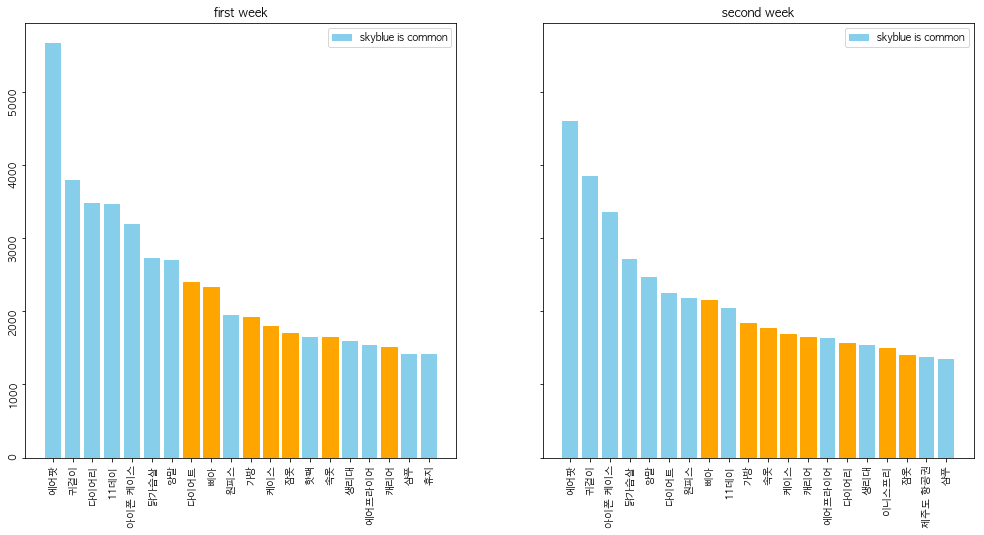

In [635]:
x[0] = text_01_2025
x[1] = text_02_2025
y[0] = text_01
y[1] = text_02
title = ['first week', 'second week']

fig, axes = plt.subplots(1,2, figsize = (17,8), sharey=True)

for j,ax in enumerate(axes.flatten()):
    ax.tick_params(labelrotation=90)
    ax.set_title(title[j])

    color_type = [i for i, x in enumerate( x[j].text[:20].isin(y[j].text[:20]) ) if x==0]
    
    barlist = ax.bar( x[j][:20].text, x[j][:20].counts, color='skyblue', label='skyblue is common')
            
    for i in range(len(color_type)):
        barlist[color_type[i]].set_color('orange')
    ax.legend(loc="upper right")

plt.show()

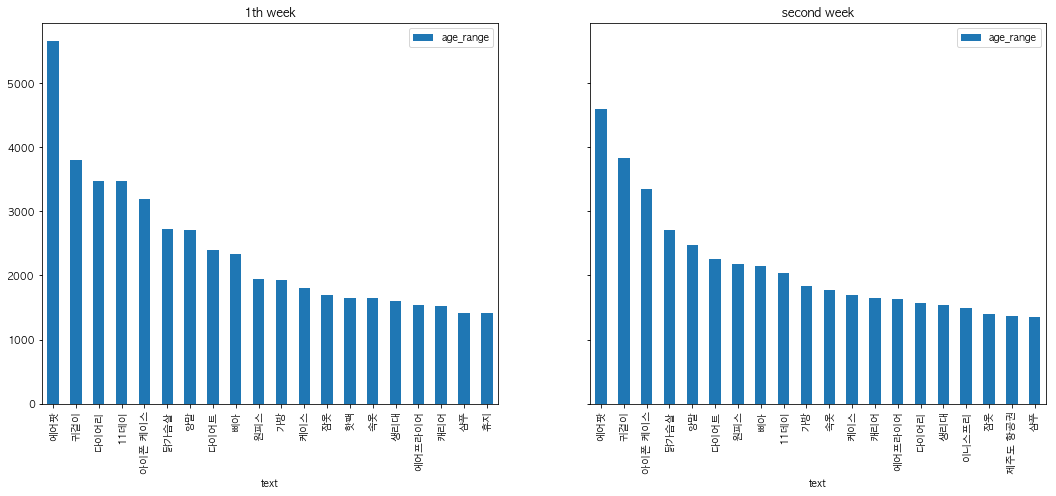

In [203]:
fig, axes = plt.subplots(1,2, figsize=(18,7), sharey=True)

data_01_refined_rd_[data_01_refined_rd_.age_range == '20-25'].groupby('text').count()\
.sort_values(by='age_range', ascending=False)\
.plot(kind='bar',stacked=False , title = '1th week' , ax=axes[0])

data_02_refined_rd_[data_02_refined_rd_.age_range == '20-25'].groupby('text').count()\
.sort_values(by='age_range', ascending=False)\
.plot(kind='bar',stacked=False , title='second week', ax=axes[1])

plt.show()

---

In [205]:
outer_2025 = pd.merge( text_01_2025, text_02_2025 , on='text', how='outer')

In [206]:
outer_2025 = outer_2025[['text', 'rank_x', 'rank_y',  'counts_x',  'counts_y']] 

In [207]:
outer_2025.head()

,text,rank_x,rank_y,counts_x,counts_y
0,에어팟,1.0,1.0,5660.0,4597.0
1,귀걸이,2.0,2.0,3796.0,3842.0
2,다이어리,3.0,15.0,3476.0,1569.0
3,11데이,4.0,9.0,3468.0,2038.0
4,아이폰 케이스,5.0,3.0,3193.0,3355.0


---

In [208]:
outer_0_2025 = outer_2025.copy()

In [209]:
outer_0_2025.counts_x = outer_0_2025.counts_x.fillna(1)

In [210]:
outer_0_2025.counts_y = outer_0_2025.counts_y.fillna(1)

In [211]:
text_01_2025[['rank']].tail(1)

,rank
142846,75141.0


In [214]:
outer_0_2025.rank_x = outer_0_2025.rank_x.fillna(75141+1)

In [215]:
outer_0_2025.tail()

,text,rank_x,rank_y,counts_x,counts_y
213974,아디다스 롱벤치,75142.0,73996.0,1.0,1.0
213975,진주알니트,75142.0,73996.0,1.0,1.0
213976,훈련,75142.0,73996.0,1.0,1.0
213977,욕실 시트지,75142.0,73996.0,1.0,1.0
213978,벽선반행거,75142.0,73996.0,1.0,1.0


In [217]:
text_02_2025[['rank']].tail(1)

,rank
140474,73996.0


In [218]:
outer_0_2025.rank_y = outer_0_2025.rank_y.fillna(73996+1)

---

In [219]:
outer_0_2025['up'] =  outer_0_2025.rank_x - outer_0_2025.rank_y 

In [220]:
outer_0_2025['increment'] = (outer_0_2025.counts_y - outer_0_2025.counts_x)/outer_0_2025.counts_x

---

## not-null dataframe 인지 확인!

In [221]:
outer_0_2025.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213979 entries, 0 to 213978
Data columns (total 7 columns):
text         213979 non-null object
rank_x       213979 non-null float64
rank_y       213979 non-null float64
counts_x     213979 non-null float64
counts_y     213979 non-null float64
up           213979 non-null float64
increment    213979 non-null float64
dtypes: float64(6), object(1)
memory usage: 13.1+ MB


In [222]:
outer_0_2025[(outer_0_2025.rank_y <= 50) & (outer_0_2025.up > 0) ].shape

(28, 7)

## # 변동성 보기

1. 50위 이내 중, 순위 상승 검색어

In [223]:
## 둘째주 50위 이내 중, 순위 상승한 검색어! - 32개

outer_0_2025[(outer_0_2025.rank_y <= 50) & (outer_0_2025.up > 0) ].sort_values(by = 'counts_y', ascending=False)

,text,rank_x,rank_y,counts_x,counts_y,up,increment
4,아이폰 케이스,5.0,3.0,3193.0,3355.0,2.0,0.050736
5,닭가슴살,6.0,4.0,2724.0,2710.0,2.0,-0.005140
6,양말,7.0,5.0,2705.0,2473.0,2.0,-0.085767
7,다이어트,8.0,6.0,2394.0,2254.0,2.0,-0.058480
9,원피스,10.0,7.0,1952.0,2184.0,3.0,0.118852
8,삐아,9.0,8.0,2328.0,2154.0,1.0,-0.074742
10,가방,11.0,10.0,1924.0,1835.0,1.0,-0.046258
14,속옷,15.0,11.0,1643.0,1769.0,4.0,0.076689
17,캐리어,18.0,13.0,1517.0,1651.0,5.0,0.088332
16,에어프라이어,17.0,14.0,1536.0,1638.0,3.0,0.066406


---

2. 100위 이내 중, increment 20% 이상 - increment 폭 큰 순서대로

In [224]:
outer_0_2025[(outer_0_2025.rank_y <= 100) & (outer_0_2025.increment >= 0.2)]\
        .sort_values(by ='increment',ascending = False)

,text,rank_x,rank_y,counts_x,counts_y,up,increment
2923,미세먼지 마스크,2840.0,69.0,48.0,775.0,2771.0,15.145833
375,아웃백,372.0,80.0,283.0,730.0,292.0,1.579505
132,더페이스샵,131.0,34.0,565.0,1096.0,97.0,0.939823
101,노트북,102.0,27.0,657.0,1218.0,75.0,0.853881
98,마스크,99.0,28.0,677.0,1210.0,71.0,0.787297
116,귀찌,116.0,65.0,612.0,825.0,51.0,0.348039
124,요가복,125.0,74.0,584.0,748.0,51.0,0.280822
129,양키캔들,130.0,86.0,574.0,709.0,44.0,0.235192
52,미샤,53.0,30.0,939.0,1142.0,23.0,0.216187
126,숏패딩,127.0,87.0,580.0,701.0,40.0,0.208621


---

### # (3) 25-30세

In [225]:
## 1주차 search 빈도 표 만들자.

text_01_2530 = pd.DataFrame({
    'text' : data_01_refined_rd[data_01_refined_rd.age_range == '25-30'].text.value_counts().index.values.tolist(),
    'counts' : data_01_refined_rd[data_01_refined_rd.age_range == '25-30'].text.value_counts().values.tolist()     })



In [226]:
# rank 세울때 동점자는 같은순위로!

text_01_2530['rank'] = text_01_2530['counts'].rank(ascending=0, method = 'min') # 이렇게 하는게 맞아~

In [228]:
text_01_2530.tail()

,text,counts,rank
169918,스킨푸드 에그폼,1,89611.0
169919,따수미텐트 가습기,1,89611.0
169920,부엉이반지,1,89611.0
169921,양,1,89611.0
169922,쓰시마섬,1,89611.0


---

In [229]:
## 2주차 search 빈도 표 만들자.

text_02_2530 = pd.DataFrame({
    'text' : data_02_refined_rd[data_02_refined_rd.age_range == '25-30'].text.value_counts().index.values.tolist(),
    'counts' : data_02_refined_rd[data_02_refined_rd.age_range == '25-30'].text.value_counts().values.tolist()     })



In [230]:
text_02_2530['rank'] = text_02_2530['counts'].rank(ascending=0, method = 'min')

In [231]:
text_02_2530.head()

,text,counts,rank
0,물티슈,2621,1.0
1,11데이,2187,2.0
2,양말,2145,3.0
3,닭가슴살,2123,4.0
4,귀걸이,1925,5.0


In [232]:
text_02_2530.tail()

,text,counts,rank
163690,밍크헤어핀,1,86125.0
163691,한포진,1,86125.0
163692,코스트코 씨리얼,1,86125.0
163693,여성의,1,86125.0
163694,미니랩,1,86125.0


In [233]:
data_01_refined_rd_ = data_01_refined_rd[ data_01_refined_rd.text.isin( text_01_2530[:20].text.values ) ]\
                        [['text', 'age_range']]

In [234]:
data_02_refined_rd_ = data_02_refined_rd[ data_02_refined_rd.text.isin( text_02_2530[:20].text.values ) ]\
                        [['text', 'age_range']]

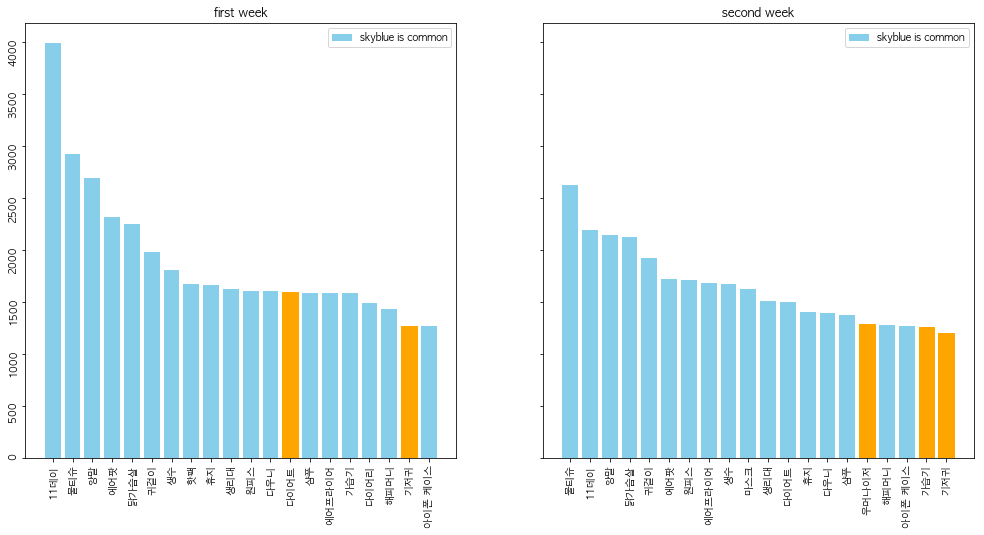

In [636]:
x[0] = text_01_2530
x[1] = text_02_2530
y[0] = text_01
y[1] = text_02
title = ['first week', 'second week']

fig, axes = plt.subplots(1,2, figsize = (17,8), sharey=True)

for j,ax in enumerate(axes.flatten()):
    ax.tick_params(labelrotation=90)
    ax.set_title(title[j])

    color_type = [i for i, x in enumerate( x[j].text[:20].isin(y[j].text[:20]) ) if x==0]
    
    barlist = ax.bar( x[j][:20].text, x[j][:20].counts, color='skyblue', label='skyblue is common')
            
    for i in range(len(color_type)):
        barlist[color_type[i]].set_color('orange')
    ax.legend(loc="upper right")

plt.show()

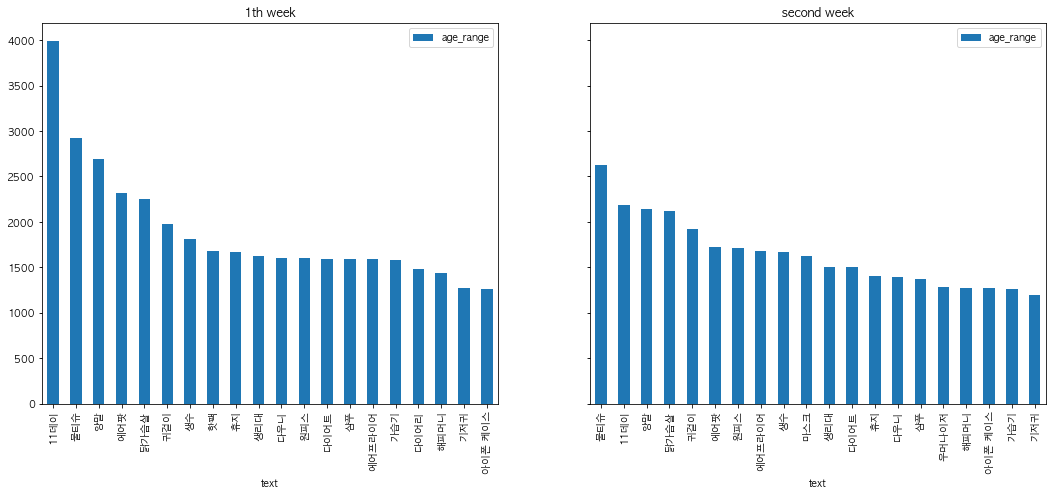

In [235]:
fig, axes = plt.subplots(1,2, figsize=(18,7), sharey=True)

data_01_refined_rd_[data_01_refined_rd_.age_range == '25-30'].groupby('text').count()\
.sort_values(by='age_range', ascending=False)\
.plot(kind='bar',stacked=False , title = '1th week' , ax=axes[0])

data_02_refined_rd_[data_02_refined_rd_.age_range == '25-30'].groupby('text').count()\
.sort_values(by='age_range', ascending=False)\
.plot(kind='bar',stacked=False , title='second week', ax=axes[1])

plt.show()

---

In [236]:
outer_2530 = pd.merge( text_01_2530, text_02_2530 , on='text', how='outer')

In [237]:
outer_2530 = outer_2530[['text', 'rank_x', 'rank_y',  'counts_x',  'counts_y']] 

In [238]:
outer_2530.head()

,text,rank_x,rank_y,counts_x,counts_y
0,11데이,1.0,2.0,3989.0,2187.0
1,물티슈,2.0,1.0,2926.0,2621.0
2,양말,3.0,3.0,2696.0,2145.0
3,에어팟,4.0,6.0,2317.0,1722.0
4,닭가슴살,5.0,4.0,2248.0,2123.0


---

In [239]:
outer_0_2530 = outer_2530.copy()

In [240]:
outer_0_2530.counts_x = outer_0_2530.counts_x.fillna(1)

In [241]:
outer_0_2530.counts_y = outer_0_2530.counts_y.fillna(1)

In [242]:
text_01_2530[['rank']].tail(1)

,rank
169922,89611.0


In [243]:
outer_0_2530.rank_x = outer_0_2530.rank_x.fillna(89611+1)

In [244]:
outer_0_2530.tail()

,text,rank_x,rank_y,counts_x,counts_y
252286,bwm,89612.0,86125.0,1.0,1.0
252287,무구어더크림,89612.0,86125.0,1.0,1.0
252288,한포진,89612.0,86125.0,1.0,1.0
252289,코스트코 씨리얼,89612.0,86125.0,1.0,1.0
252290,미니랩,89612.0,86125.0,1.0,1.0


In [245]:
text_02_2530[['rank']].tail(1)

,rank
163694,86125.0


In [246]:
outer_0_2530.rank_y = outer_0_2530.rank_y.fillna(86125+1)

---

In [247]:
outer_0_2530['up'] =  outer_0_2530.rank_x - outer_0_2530.rank_y 

In [248]:
outer_0_2530['increment'] = (outer_0_2530.counts_y - outer_0_2530.counts_x)/outer_0_2530.counts_x

---

## not-null dataframe 인지 확인!

In [249]:
outer_0_2530.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252291 entries, 0 to 252290
Data columns (total 7 columns):
text         252291 non-null object
rank_x       252291 non-null float64
rank_y       252291 non-null float64
counts_x     252291 non-null float64
counts_y     252291 non-null float64
up           252291 non-null float64
increment    252291 non-null float64
dtypes: float64(6), object(1)
memory usage: 15.4+ MB


In [250]:
outer_0_2530[(outer_0_2530.rank_y <= 50) & (outer_0_2530.up > 0) ].shape

(26, 7)

## # 변동성 보기

1. 50위 이내 중, 순위 상승 검색어

In [251]:
## 둘째주 50위 이내 중, 순위 상승한 검색어! - 32개

outer_0_2530[(outer_0_2530.rank_y <= 50) & (outer_0_2530.up > 0) ].sort_values(by = 'counts_y', ascending=False)

,text,rank_x,rank_y,counts_x,counts_y,up,increment
1,물티슈,2.0,1.0,2926.0,2621.0,1.0,-0.104238
4,닭가슴살,5.0,4.0,2248.0,2123.0,1.0,-0.055605
5,귀걸이,6.0,5.0,1977.0,1925.0,1.0,-0.026302
10,원피스,11.0,7.0,1601.0,1713.0,4.0,0.069956
14,에어프라이어,15.0,8.0,1588.0,1683.0,7.0,0.059824
47,마스크,48.0,10.0,821.0,1621.0,38.0,0.974421
12,다이어트,13.0,12.0,1591.0,1499.0,1.0,-0.057825
79,우머나이저,80.0,16.0,675.0,1288.0,64.0,0.908148
17,해피머니,18.0,17.0,1434.0,1277.0,1.0,-0.109484
19,아이폰 케이스,20.0,18.0,1263.0,1268.0,2.0,0.003959


---

2. 100위 이내 중, increment 20% 이상 - increment 폭 큰 순서대로

In [252]:
outer_0_2530[(outer_0_2530.rank_y <= 100) & (outer_0_2530.increment >= 0.2)]\
        .sort_values(by ='increment',ascending = False)

,text,rank_x,rank_y,counts_x,counts_y,up,increment
44901,1+1특가,37886.0,79.0,3.0,633.0,37807.0,210.000000
18119,투움바,16881.0,57.0,8.0,733.0,16824.0,90.625000
1470,미세먼지 마스크,1459.0,51.0,102.0,789.0,1408.0,6.735294
427,아웃백,425.0,25.0,252.0,1059.0,400.0,3.202381
182,더페이스샵,183.0,42.0,413.0,836.0,141.0,1.024213
47,마스크,48.0,10.0,821.0,1621.0,38.0,0.974421
131,노트북,132.0,30.0,513.0,996.0,102.0,0.941520
79,우머나이저,80.0,16.0,675.0,1288.0,64.0,0.908148
298,한복,299.0,98.0,309.0,538.0,201.0,0.741100
124,코트,124.0,71.0,530.0,651.0,53.0,0.228302


---

### # (4) 30-35세

In [253]:
## 1주차 search 빈도 표 만들자.

text_01_3035 = pd.DataFrame({
    'text' : data_01_refined_rd[data_01_refined_rd.age_range == '30-35'].text.value_counts().index.values.tolist(),
    'counts' : data_01_refined_rd[data_01_refined_rd.age_range == '30-35'].text.value_counts().values.tolist()     })



In [254]:
# rank 세울때 동점자는 같은순위로!

text_01_3035['rank'] = text_01_3035['counts'].rank(ascending=0, method = 'min') # 이렇게 하는게 맞아~

In [255]:
text_01_3035.tail()

,text,counts,rank
196751,커플 아이템,1,107833.0
196752,올리브유세트,1,107833.0
196753,토네이도 드라이기,1,107833.0
196754,과일스티커,1,107833.0
196755,파세코김치냉장고,1,107833.0


---

In [256]:
## 2주차 search 빈도 표 만들자.

text_02_3035 = pd.DataFrame({
    'text' : data_02_refined_rd[data_02_refined_rd.age_range == '30-35'].text.value_counts().index.values.tolist(),
    'counts' : data_02_refined_rd[data_02_refined_rd.age_range == '30-35'].text.value_counts().values.tolist()     })



In [257]:
text_02_3035['rank'] = text_02_3035['counts'].rank(ascending=0, method = 'min')

In [258]:
text_02_3035.head()

,text,counts,rank
0,물티슈,4228,1.0
1,베베숲,2431,2.0
2,11데이,2414,3.0
3,기저귀,2397,4.0
4,해피머니,2173,5.0


In [259]:
text_02_3035.tail()

,text,counts,rank
188414,아이비젼루테인,1,103371.0
188415,코모치야리,1,103371.0
188416,입캔디,1,103371.0
188417,펜텔 샤프심,1,103371.0
188418,수유볻,1,103371.0


In [260]:
data_01_refined_rd_ = data_01_refined_rd[ data_01_refined_rd.text.isin( text_01_3035[:20].text.values ) ]\
                        [['text', 'age_range']]

In [261]:
data_02_refined_rd_ = data_02_refined_rd[ data_02_refined_rd.text.isin( text_02_3035[:20].text.values ) ]\
                        [['text', 'age_range']]

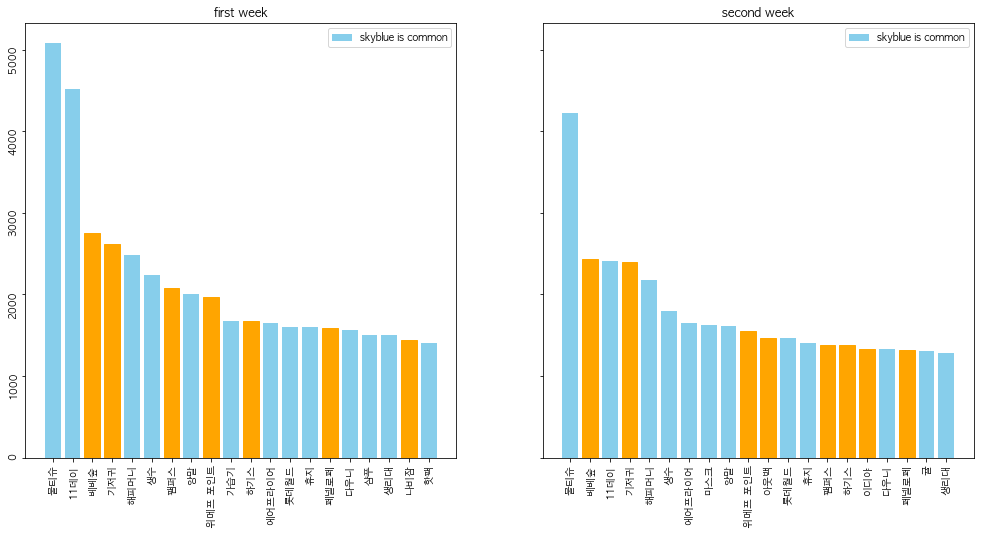

In [637]:
x[0] = text_01_3035
x[1] = text_02_3035
y[0] = text_01
y[1] = text_02
title = ['first week', 'second week']

fig, axes = plt.subplots(1,2, figsize = (17,8), sharey=True)

for j,ax in enumerate(axes.flatten()):
    ax.tick_params(labelrotation=90)
    ax.set_title(title[j])
    
    color_type = [i for i, x in enumerate( x[j].text[:20].isin(y[j].text[:20]) ) if x==0]
    
    barlist = ax.bar( x[j][:20].text, x[j][:20].counts, color='skyblue', label='skyblue is common')
            
    for i in range(len(color_type)):
        barlist[color_type[i]].set_color('orange')
    ax.legend(loc="upper right")

plt.show()

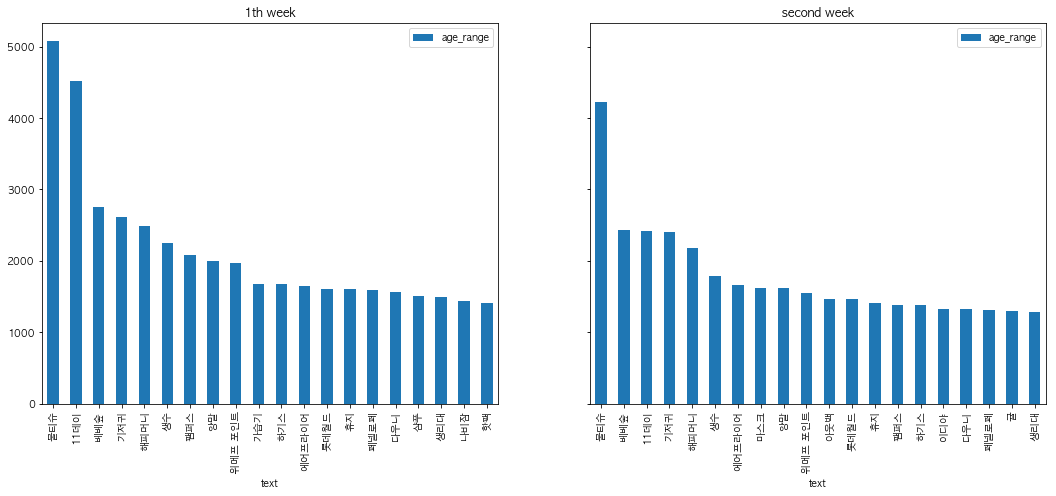

In [262]:
fig, axes = plt.subplots(1,2, figsize=(18,7), sharey=True)

data_01_refined_rd_[data_01_refined_rd_.age_range == '30-35'].groupby('text').count()\
.sort_values(by='age_range', ascending=False)\
.plot(kind='bar',stacked=False , title = '1th week' , ax=axes[0])

data_02_refined_rd_[data_02_refined_rd_.age_range == '30-35'].groupby('text').count()\
.sort_values(by='age_range', ascending=False)\
.plot(kind='bar',stacked=False , title='second week', ax=axes[1])

plt.show()

---

In [263]:
outer_3035 = pd.merge( text_01_3035, text_02_3035 , on='text', how='outer')

In [264]:
outer_3035 = outer_3035[['text', 'rank_x', 'rank_y',  'counts_x',  'counts_y']] 

In [265]:
outer_3035.head()

,text,rank_x,rank_y,counts_x,counts_y
0,물티슈,1.0,1.0,5076.0,4228.0
1,11데이,2.0,3.0,4512.0,2414.0
2,베베숲,3.0,2.0,2754.0,2431.0
3,기저귀,4.0,4.0,2617.0,2397.0
4,해피머니,5.0,5.0,2485.0,2173.0


---

In [266]:
outer_0_3035 = outer_3035.copy()

In [267]:
outer_0_3035.counts_x = outer_0_3035.counts_x.fillna(1)

In [268]:
outer_0_3035.counts_y = outer_0_3035.counts_y.fillna(1)

In [269]:
text_01_3035[['rank']].tail(1)

,rank
196755,107833.0


In [272]:
outer_0_3035.rank_x = outer_0_3035.rank_x.fillna(107833+1)

In [273]:
outer_0_3035.tail()

,text,rank_x,rank_y,counts_x,counts_y
289267,아이비젼루테인,107834.0,103371.0,1.0,1.0
289268,코모치야리,107834.0,103371.0,1.0,1.0
289269,입캔디,107834.0,103371.0,1.0,1.0
289270,펜텔 샤프심,107834.0,103371.0,1.0,1.0
289271,수유볻,107834.0,103371.0,1.0,1.0


In [274]:
text_02_3035[['rank']].tail(1)

,rank
188418,103371.0


In [275]:
outer_0_3035.rank_y = outer_0_3035.rank_y.fillna(103371+1)

---

In [276]:
outer_0_3035['up'] =  outer_0_3035.rank_x - outer_0_3035.rank_y 

In [277]:
outer_0_3035['increment'] = (outer_0_3035.counts_y - outer_0_3035.counts_x)/outer_0_3035.counts_x

---

## not-null dataframe 인지 확인!

In [278]:
outer_0_3035.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289272 entries, 0 to 289271
Data columns (total 7 columns):
text         289272 non-null object
rank_x       289272 non-null float64
rank_y       289272 non-null float64
counts_x     289272 non-null float64
counts_y     289272 non-null float64
up           289272 non-null float64
increment    289272 non-null float64
dtypes: float64(6), object(1)
memory usage: 17.7+ MB


In [279]:
outer_0_3035[(outer_0_3035.rank_y <= 50) & (outer_0_3035.up > 0) ].shape

(21, 7)

## # 변동성 보기

1. 50위 이내 중, 순위 상승 검색어

In [280]:
## 둘째주 50위 이내 중, 순위 상승한 검색어! - 32개

outer_0_3035[(outer_0_3035.rank_y <= 50) & (outer_0_3035.up > 0) ].sort_values(by = 'counts_y', ascending=False)

,text,rank_x,rank_y,counts_x,counts_y,up,increment
2,베베숲,3.0,2.0,2754.0,2431.0,1.0,-0.117284
11,에어프라이어,12.0,7.0,1644.0,1654.0,5.0,0.006083
38,마스크,39.0,8.0,1018.0,1625.0,31.0,0.596267
593,아웃백,591.0,11.0,242.0,1464.0,580.0,5.049587
12,롯데월드,13.0,12.0,1606.0,1462.0,1.0,-0.089664
13,휴지,14.0,13.0,1600.0,1407.0,1.0,-0.120625
20,이디야,21.0,16.0,1341.0,1328.0,5.0,-0.009694
22,귤,23.0,19.0,1315.0,1300.0,4.0,-0.011407
43,앙블랑,44.0,22.0,988.0,1279.0,22.0,0.294534
100,한복,101.0,23.0,650.0,1276.0,78.0,0.963077


---

2. 100위 이내 중, increment 20% 이상 - increment 폭 큰 순서대로

In [282]:
outer_0_3035[(outer_0_3035.rank_y <= 100) & (outer_0_3035.increment >= 0.2)]\
        .sort_values(by ='increment',ascending = False)

,text,rank_x,rank_y,counts_x,counts_y,up,increment
29101,투움바,26411.0,66.0,6.0,766.0,26345.0,126.666667
24935,1+1특가,23286.0,61.0,7.0,808.0,23225.0,114.428571
15933,투움바파스타,14932.0,57.0,12.0,823.0,14875.0,67.583333
1569,미세먼지 마스크,1552.0,46.0,118.0,905.0,1506.0,6.669492
593,아웃백,591.0,11.0,242.0,1464.0,580.0,5.049587
433,노트북,434.0,90.0,300.0,656.0,344.0,1.186667
100,한복,101.0,23.0,650.0,1276.0,78.0,0.963077
202,아동한복,201.0,53.0,444.0,829.0,148.0,0.867117
309,에버랜드,310.0,94.0,360.0,644.0,216.0,0.788889
71,유아한복,72.0,24.0,760.0,1263.0,48.0,0.661842


---

### # (5) 35-40세

In [283]:
## 1주차 search 빈도 표 만들자.

text_01_3540 = pd.DataFrame({
    'text' : data_01_refined_rd[data_01_refined_rd.age_range == '35-40'].text.value_counts().index.values.tolist(),
    'counts' : data_01_refined_rd[data_01_refined_rd.age_range == '35-40'].text.value_counts().values.tolist()     })



In [284]:
# rank 세울때 동점자는 같은순위로!

text_01_3540['rank'] = text_01_3540['counts'].rank(ascending=0, method = 'min') # 이렇게 하는게 맞아~

In [285]:
text_01_3540.tail()

,text,counts,rank
234927,프로스펙스 트레이닝복,1,138293.0
234928,주치,1,138293.0
234929,비탄,1,138293.0
234930,에이프런,1,138293.0
234931,라탄 5단,1,138293.0


---

In [286]:
## 2주차 search 빈도 표 만들자.

text_02_3540 = pd.DataFrame({
    'text' : data_02_refined_rd[data_02_refined_rd.age_range == '35-40'].text.value_counts().index.values.tolist(),
    'counts' : data_02_refined_rd[data_02_refined_rd.age_range == '35-40'].text.value_counts().values.tolist()     })



In [287]:
text_02_3540['rank'] = text_02_3540['counts'].rank(ascending=0, method = 'min')

In [288]:
text_02_3540.head()

,text,counts,rank
0,물티슈,6212,1.0
1,롯데월드,3338,2.0
2,베베숲,2738,3.0
3,해피머니,2617,4.0
4,귤,2499,5.0


In [289]:
text_02_3540.tail()

,text,counts,rank
226018,매일과자,1,133109.0
226019,노트9공기계,1,133109.0
226020,아기침대매트리스,1,133109.0
226021,라인프렌즈인형,1,133109.0
226022,수도잠금장치,1,133109.0


In [290]:
data_01_refined_rd_ = data_01_refined_rd[ data_01_refined_rd.text.isin( text_01_3540[:20].text.values ) ]\
                        [['text', 'age_range']]

In [291]:
data_02_refined_rd_ = data_02_refined_rd[ data_02_refined_rd.text.isin( text_02_3540[:20].text.values ) ]\
                        [['text', 'age_range']]

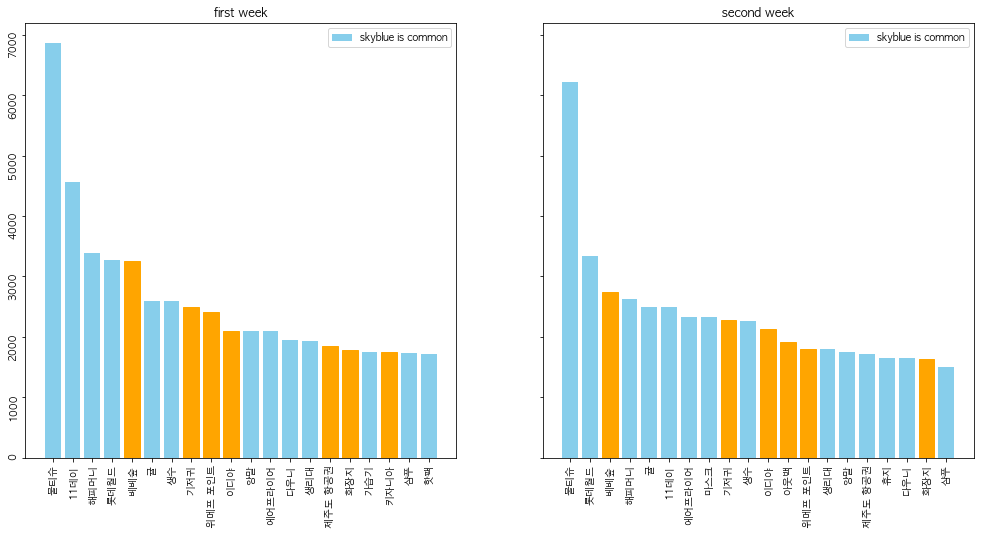

In [638]:
x[0] = text_01_3540
x[1] = text_02_3540
y[0] = text_01
y[1] = text_02
title = ['first week', 'second week']

fig, axes = plt.subplots(1,2, figsize = (17,8), sharey=True)

for j,ax in enumerate(axes.flatten()):
    ax.tick_params(labelrotation=90)
    ax.set_title(title[j])
    
    color_type = [i for i, x in enumerate( x[j].text[:20].isin(y[j].text[:20]) ) if x==0]
    
    barlist = ax.bar( x[j][:20].text, x[j][:20].counts, color='skyblue', label='skyblue is common')
            
    for i in range(len(color_type)):
        barlist[color_type[i]].set_color('orange')
    ax.legend(loc="upper right")

plt.show()

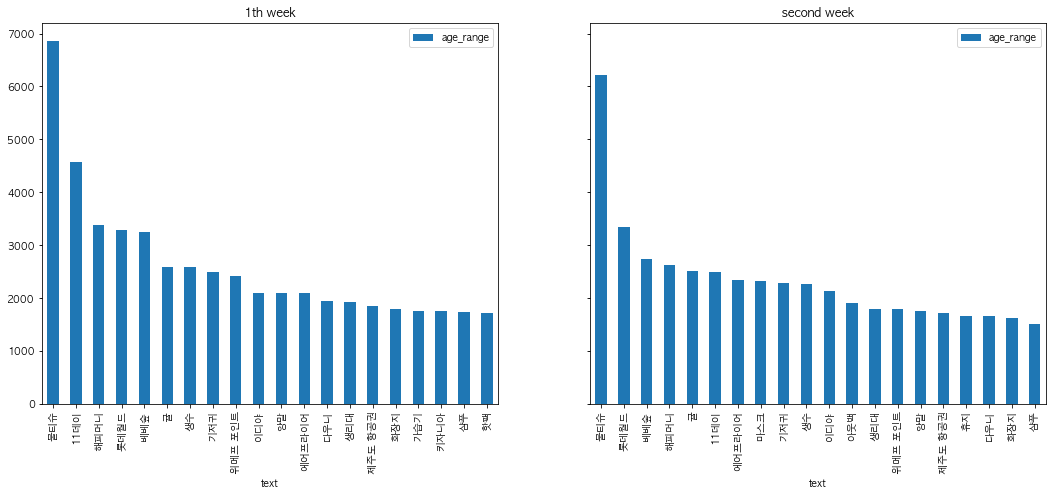

In [292]:
fig, axes = plt.subplots(1,2, figsize=(18,7), sharey=True)

data_01_refined_rd_[data_01_refined_rd_.age_range == '35-40'].groupby('text').count()\
.sort_values(by='age_range', ascending=False)\
.plot(kind='bar',stacked=False , title = '1th week' , ax=axes[0])

data_02_refined_rd_[data_02_refined_rd_.age_range == '35-40'].groupby('text').count()\
.sort_values(by='age_range', ascending=False)\
.plot(kind='bar',stacked=False , title='second week', ax=axes[1])

plt.show()

---

In [293]:
outer_3540 = pd.merge( text_01_3540, text_02_3540 , on='text', how='outer')

In [294]:
outer_3540 = outer_3540[['text', 'rank_x', 'rank_y',  'counts_x',  'counts_y']] 

In [295]:
outer_3540.head()

,text,rank_x,rank_y,counts_x,counts_y
0,물티슈,1.0,1.0,6857.0,6212.0
1,11데이,2.0,6.0,4569.0,2485.0
2,해피머니,3.0,4.0,3386.0,2617.0
3,롯데월드,4.0,2.0,3275.0,3338.0
4,베베숲,5.0,3.0,3249.0,2738.0


---

In [296]:
outer_0_3540 = outer_3540.copy()

In [297]:
outer_0_3540.counts_x = outer_0_3540.counts_x.fillna(1)

In [298]:
outer_0_3540.counts_y = outer_0_3540.counts_y.fillna(1)

In [299]:
text_01_3540[['rank']].tail(1)

,rank
234931,138293.0


In [300]:
outer_0_3540.rank_x = outer_0_3540.rank_x.fillna(138293+1)

In [301]:
outer_0_3540.tail()

,text,rank_x,rank_y,counts_x,counts_y
344599,노와이어브라빅사이즈,138294.0,133109.0,1.0,1.0
344600,매일과자,138294.0,133109.0,1.0,1.0
344601,노트9공기계,138294.0,133109.0,1.0,1.0
344602,아기침대매트리스,138294.0,133109.0,1.0,1.0
344603,수도잠금장치,138294.0,133109.0,1.0,1.0


In [302]:
text_02_3540[['rank']].tail(1)

,rank
226022,133109.0


In [303]:
outer_0_3540.rank_y = outer_0_3540.rank_y.fillna(133109+1)

---

In [304]:
outer_0_3540['up'] =  outer_0_3540.rank_x - outer_0_3540.rank_y 

In [305]:
outer_0_3540['increment'] = (outer_0_3540.counts_y - outer_0_3540.counts_x)/outer_0_3540.counts_x

---

## not-null dataframe 인지 확인!

In [306]:
outer_0_3540.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344604 entries, 0 to 344603
Data columns (total 7 columns):
text         344604 non-null object
rank_x       344604 non-null float64
rank_y       344604 non-null float64
counts_x     344604 non-null float64
counts_y     344604 non-null float64
up           344604 non-null float64
increment    344604 non-null float64
dtypes: float64(6), object(1)
memory usage: 21.0+ MB


In [307]:
outer_0_3540[(outer_0_3540.rank_y <= 50) & (outer_0_3540.up > 0) ].shape

(25, 7)

## # 변동성 보기

1. 50위 이내 중, 순위 상승 검색어

In [308]:
## 둘째주 50위 이내 중, 순위 상승한 검색어! - 32개

outer_0_3540[(outer_0_3540.rank_y <= 50) & (outer_0_3540.up > 0) ].sort_values(by = 'counts_y', ascending=False)

,text,rank_x,rank_y,counts_x,counts_y,up,increment
3,롯데월드,4.0,2.0,3275.0,3338.0,2.0,0.019237
4,베베숲,5.0,3.0,3249.0,2738.0,2.0,-0.157279
5,귤,6.0,5.0,2588.0,2499.0,1.0,-0.034389
11,에어프라이어,12.0,7.0,2091.0,2334.0,5.0,0.116212
32,마스크,33.0,8.0,1423.0,2321.0,25.0,0.631061
627,아웃백,628.0,12.0,299.0,1906.0,616.0,5.374582
13,생리대,14.0,13.0,1928.0,1797.0,1.0,-0.067946
21,휴지,22.0,17.0,1626.0,1655.0,5.0,0.017835
128,한복,129.0,21.0,750.0,1472.0,108.0,0.962667
27,커피,28.0,22.0,1484.0,1432.0,6.0,-0.035040


---

2. 100위 이내 중, increment 20% 이상 - increment 폭 큰 순서대로

In [309]:
outer_0_3540[(outer_0_3540.rank_y <= 100) & (outer_0_3540.increment >= 0.2)]\
        .sort_values(by ='increment',ascending = False)

,text,rank_x,rank_y,counts_x,counts_y,up,increment
9797,투움바파스타,9581.0,55.0,27.0,1037.0,9526.0,37.407407
627,아웃백,628.0,12.0,299.0,1906.0,616.0,5.374582
1006,미세먼지 마스크,1002.0,25.0,220.0,1400.0,977.0,5.363636
986,황사 마스크,987.0,42.0,222.0,1155.0,945.0,4.202703
384,더페이스샵,385.0,89.0,407.0,887.0,296.0,1.179361
181,아동한복,182.0,28.0,629.0,1364.0,154.0,1.168521
157,에버랜드,158.0,29.0,685.0,1358.0,129.0,0.982482
369,노트북,370.0,99.0,419.0,827.0,271.0,0.973747
128,한복,129.0,21.0,750.0,1472.0,108.0,0.962667
200,유아한복,201.0,44.0,594.0,1144.0,157.0,0.925926


---

### # (6) 40-50세

In [310]:
## 1주차 search 빈도 표 만들자.

text_01_4050 = pd.DataFrame({
    'text' : data_01_refined_rd[data_01_refined_rd.age_range == '40-50'].text.value_counts().index.values.tolist(),
    'counts' : data_01_refined_rd[data_01_refined_rd.age_range == '40-50'].text.value_counts().values.tolist()     })



In [311]:
# rank 세울때 동점자는 같은순위로!

text_01_4050['rank'] = text_01_4050['counts'].rank(ascending=0, method = 'min') # 이렇게 하는게 맞아~

In [312]:
text_01_4050.tail()

,text,counts,rank
212355,아쿠아워터,1,126048.0
212356,메디앤서콜라겐팩,1,126048.0
212357,키즈썬캡,1,126048.0
212358,노비스패딩,1,126048.0
212359,차량용캔들,1,126048.0


---

In [313]:
## 2주차 search 빈도 표 만들자.

text_02_4050 = pd.DataFrame({
    'text' : data_02_refined_rd[data_02_refined_rd.age_range == '40-50'].text.value_counts().index.values.tolist(),
    'counts' : data_02_refined_rd[data_02_refined_rd.age_range == '40-50'].text.value_counts().values.tolist()     })



In [314]:
text_02_4050['rank'] = text_02_4050['counts'].rank(ascending=0, method = 'min')

In [315]:
text_02_4050.head()

,text,counts,rank
0,물티슈,3429,1.0
1,귤,3233,2.0
2,에어프라이어,3082,3.0
3,생수,2653,4.0
4,롯데월드,2492,5.0


In [316]:
text_02_4050.tail()

,text,counts,rank
207527,개방형 실리콘 빨대,1,123938.0
207528,일회용 치약,1,123938.0
207529,짖음방지 스프레이,1,123938.0
207530,예쁜컵세트,1,123938.0
207531,함덕해수욕장 호텔,1,123938.0


In [317]:
data_01_refined_rd_ = data_01_refined_rd[ data_01_refined_rd.text.isin( text_01_4050[:20].text.values ) ]\
                        [['text', 'age_range']]

In [318]:
data_02_refined_rd_ = data_02_refined_rd[ data_02_refined_rd.text.isin( text_02_4050[:20].text.values ) ]\
                        [['text', 'age_range']]

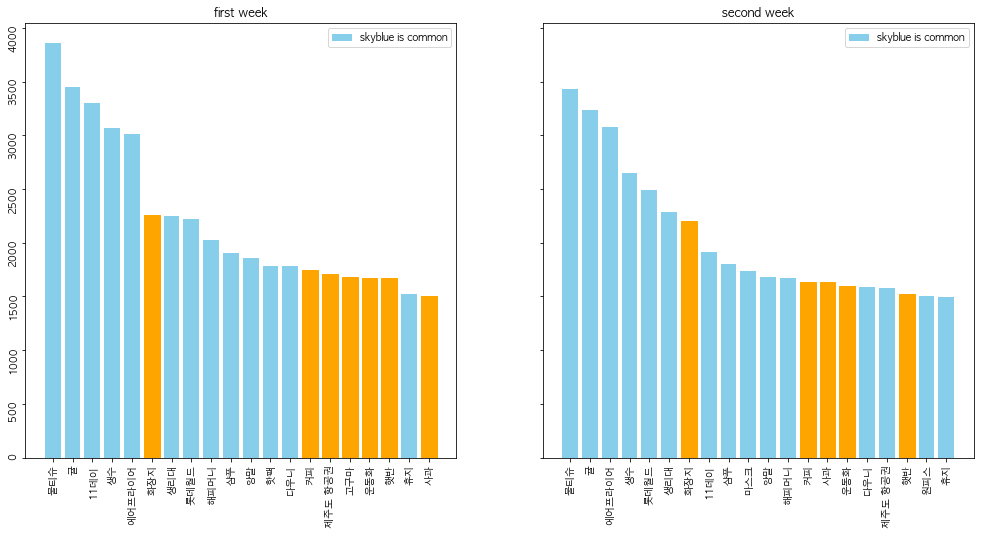

In [639]:
x[0] = text_01_4050
x[1] = text_02_4050
y[0] = text_01
y[1] = text_02
title = ['first week', 'second week']

fig, axes = plt.subplots(1,2, figsize = (17,8), sharey=True)

for j,ax in enumerate(axes.flatten()):
    ax.tick_params(labelrotation=90)
    ax.set_title(title[j])
    
    color_type = [i for i, x in enumerate( x[j].text[:20].isin(y[j].text[:20]) ) if x==0]
    
    barlist = ax.bar( x[j][:20].text, x[j][:20].counts, color='skyblue', label='skyblue is common')
            
    for i in range(len(color_type)):
        barlist[color_type[i]].set_color('orange')
    ax.legend(loc="upper right")

plt.show()

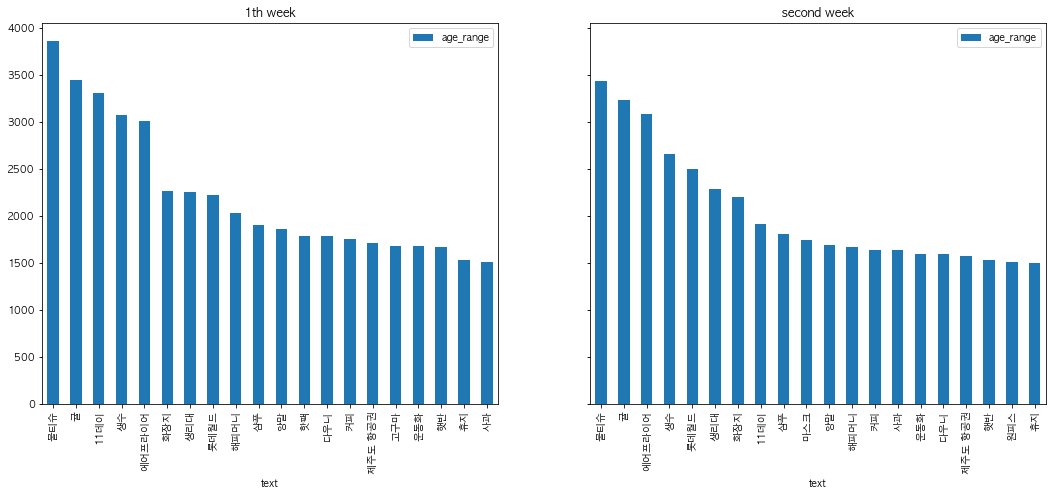

In [319]:
fig, axes = plt.subplots(1,2, figsize=(18,7), sharey=True)

data_01_refined_rd_[data_01_refined_rd_.age_range == '40-50'].groupby('text').count()\
.sort_values(by='age_range', ascending=False)\
.plot(kind='bar',stacked=False , title = '1th week' , ax=axes[0])

data_02_refined_rd_[data_02_refined_rd_.age_range == '40-50'].groupby('text').count()\
.sort_values(by='age_range', ascending=False)\
.plot(kind='bar',stacked=False , title='second week', ax=axes[1])

plt.show()

---

In [320]:
outer_4050 = pd.merge( text_01_4050, text_02_4050 , on='text', how='outer')

In [321]:
outer_4050 = outer_4050[['text', 'rank_x', 'rank_y',  'counts_x',  'counts_y']] 

In [322]:
outer_4050.head()

,text,rank_x,rank_y,counts_x,counts_y
0,물티슈,1.0,1.0,3857.0,3429.0
1,귤,2.0,2.0,3448.0,3233.0
2,11데이,3.0,8.0,3300.0,1913.0
3,생수,4.0,4.0,3067.0,2653.0
4,에어프라이어,5.0,3.0,3012.0,3082.0


---

In [323]:
outer_0_4050 = outer_4050.copy()

In [324]:
outer_0_4050.counts_x = outer_0_4050.counts_x.fillna(1)

In [325]:
outer_0_4050.counts_y = outer_0_4050.counts_y.fillna(1)

In [326]:
text_01_4050[['rank']].tail(1)

,rank
212359,126048.0


In [327]:
outer_0_4050.rank_x = outer_0_4050.rank_x.fillna(126048+1)

In [328]:
outer_0_4050.tail()

,text,rank_x,rank_y,counts_x,counts_y
318732,수영폴리백,126049.0,123938.0,1.0,1.0
318733,개방형 실리콘 빨대,126049.0,123938.0,1.0,1.0
318734,짖음방지 스프레이,126049.0,123938.0,1.0,1.0
318735,예쁜컵세트,126049.0,123938.0,1.0,1.0
318736,함덕해수욕장 호텔,126049.0,123938.0,1.0,1.0


In [329]:
text_02_4050[['rank']].tail(1)

,rank
207531,123938.0


In [330]:
outer_0_4050.rank_y = outer_0_4050.rank_y.fillna(123938+1)

---

In [331]:
outer_0_4050['up'] =  outer_0_4050.rank_x - outer_0_4050.rank_y 

In [332]:
outer_0_4050['increment'] = (outer_0_4050.counts_y - outer_0_4050.counts_x)/outer_0_4050.counts_x

---

## not-null dataframe 인지 확인!

In [333]:
outer_0_4050.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318737 entries, 0 to 318736
Data columns (total 7 columns):
text         318737 non-null object
rank_x       318737 non-null float64
rank_y       318737 non-null float64
counts_x     318737 non-null float64
counts_y     318737 non-null float64
up           318737 non-null float64
increment    318737 non-null float64
dtypes: float64(6), object(1)
memory usage: 19.5+ MB


In [334]:
outer_0_4050[(outer_0_4050.rank_y <= 50) & (outer_0_4050.up > 0) ].shape

(27, 7)

## # 변동성 보기

1. 50위 이내 중, 순위 상승 검색어

In [335]:
## 둘째주 50위 이내 중, 순위 상승한 검색어! - 32개

outer_0_4050[(outer_0_4050.rank_y <= 50) & (outer_0_4050.up > 0) ].sort_values(by = 'counts_y', ascending=False)

,text,rank_x,rank_y,counts_x,counts_y,up,increment
4,에어프라이어,5.0,3.0,3012.0,3082.0,2.0,0.023240
7,롯데월드,8.0,5.0,2224.0,2492.0,3.0,0.120504
6,생리대,7.0,6.0,2248.0,2284.0,1.0,0.016014
9,샴푸,10.0,9.0,1904.0,1800.0,1.0,-0.054622
38,마스크,39.0,10.0,1105.0,1737.0,29.0,0.571946
13,커피,14.0,13.0,1751.0,1639.0,1.0,-0.063963
19,사과,20.0,14.0,1508.0,1638.0,6.0,0.086207
16,운동화,17.0,15.0,1673.0,1595.0,2.0,-0.046623
22,원피스,23.0,19.0,1440.0,1506.0,4.0,0.045833
26,가방,27.0,23.0,1350.0,1367.0,4.0,0.012593


---

2. 100위 이내 중, increment 20% 이상 - increment 폭 큰 순서대로

In [336]:
outer_0_4050[(outer_0_4050.rank_y <= 100) & (outer_0_4050.increment >= 0.2)]\
        .sort_values(by ='increment',ascending = False)

,text,rank_x,rank_y,counts_x,counts_y,up,increment
1033,황사 마스크,1033.0,39.0,172.0,1050.0,994.0,5.104651
1595,미세먼지 마스크,1589.0,82.0,125.0,753.0,1507.0,5.024000
1138,아웃백,1134.0,48.0,161.0,930.0,1086.0,4.776398
989,연자육,986.0,61.0,180.0,849.0,925.0,3.716667
408,공기 청정기,409.0,58.0,330.0,853.0,351.0,1.584848
396,에버랜드,397.0,77.0,335.0,773.0,320.0,1.307463
166,더페이스샵,166.0,43.0,542.0,1011.0,123.0,0.865314
126,노트북,126.0,37.0,643.0,1063.0,89.0,0.653188
38,마스크,39.0,10.0,1105.0,1737.0,29.0,0.571946
125,이니스프리,126.0,50.0,643.0,910.0,76.0,0.415241


---

### # (7) 50-60세

In [337]:
## 1주차 search 빈도 표 만들자.

text_01_5060 = pd.DataFrame({
    'text' : data_01_refined_rd[data_01_refined_rd.age_range == '50-60'].text.value_counts().index.values.tolist(),
    'counts' : data_01_refined_rd[data_01_refined_rd.age_range == '50-60'].text.value_counts().values.tolist()     })



In [338]:
# rank 세울때 동점자는 같은순위로!

text_01_5060['rank'] = text_01_5060['counts'].rank(ascending=0, method = 'min') # 이렇게 하는게 맞아~

In [339]:
text_01_5060.tail()

,text,counts,rank
84964,오버코트,1,46209.0
84965,도넛귀마개,1,46209.0
84966,원터치 난방텐트,1,46209.0
84967,ugg,1,46209.0
84968,유아베게,1,46209.0


---

In [340]:
## 2주차 search 빈도 표 만들자.

text_02_5060 = pd.DataFrame({
    'text' : data_02_refined_rd[data_02_refined_rd.age_range == '50-60'].text.value_counts().index.values.tolist(),
    'counts' : data_02_refined_rd[data_02_refined_rd.age_range == '50-60'].text.value_counts().values.tolist()     })



In [341]:
text_02_5060['rank'] = text_02_5060['counts'].rank(ascending=0, method = 'min')

In [342]:
text_02_5060.head()

,text,counts,rank
0,에어프라이어,1363,1.0
1,귤,1002,2.0
2,생수,990,3.0
3,사과,898,4.0
4,커피,705,5.0


In [343]:
text_02_5060.tail()

,text,counts,rank
82578,스파클 생수 500,1,45297.0
82579,파이롯트프릭션,1,45297.0
82580,오리온오징어땅콩,1,45297.0
82581,유니테크,1,45297.0
82582,꼬마,1,45297.0


In [344]:
data_01_refined_rd_ = data_01_refined_rd[ data_01_refined_rd.text.isin( text_01_5060[:20].text.values ) ]\
                        [['text', 'age_range']]

In [345]:
data_02_refined_rd_ = data_02_refined_rd[ data_02_refined_rd.text.isin( text_02_5060[:20].text.values ) ]\
                        [['text', 'age_range']]

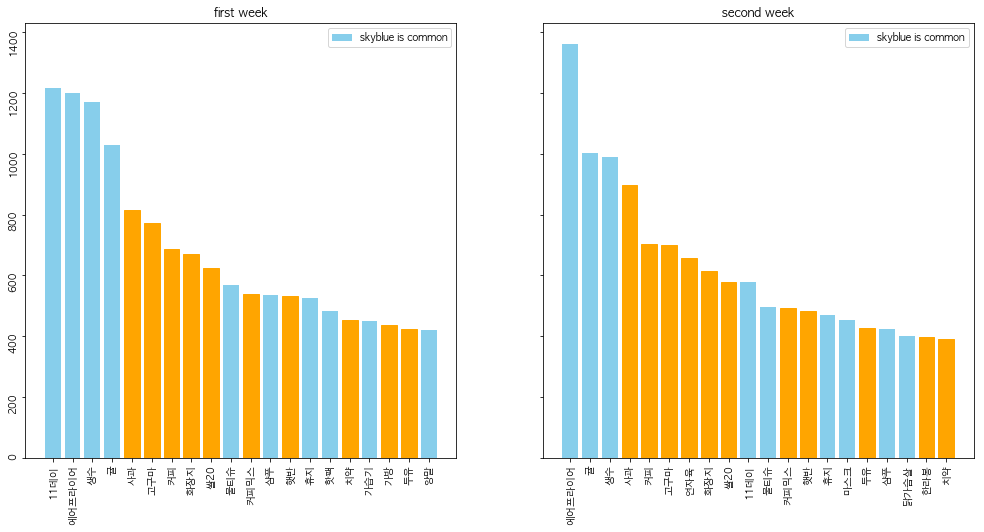

In [640]:
x[0] = text_01_5060
x[1] = text_02_5060
y[0] = text_01
y[1] = text_02
title = ['first week', 'second week']

fig, axes = plt.subplots(1,2, figsize = (17,8), sharey=True)

for j,ax in enumerate(axes.flatten()):
    ax.tick_params(labelrotation=90)
    ax.set_title(title[j])
    
    color_type = [i for i, x in enumerate( x[j].text[:20].isin(y[j].text[:20]) ) if x==0]
    
    barlist = ax.bar( x[j][:20].text, x[j][:20].counts, color='skyblue', label='skyblue is common')
            
    for i in range(len(color_type)):
        barlist[color_type[i]].set_color('orange')
    ax.legend(loc="upper right")

plt.show()

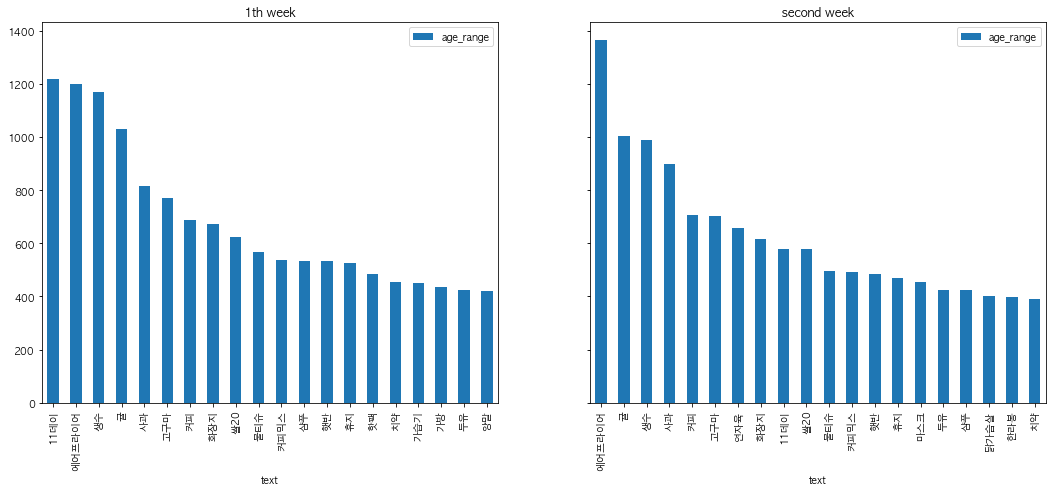

In [346]:
fig, axes = plt.subplots(1,2, figsize=(18,7), sharey=True)

data_01_refined_rd_[data_01_refined_rd_.age_range == '50-60'].groupby('text').count()\
.sort_values(by='age_range', ascending=False)\
.plot(kind='bar',stacked=False , title = '1th week' , ax=axes[0])

data_02_refined_rd_[data_02_refined_rd_.age_range == '50-60'].groupby('text').count()\
.sort_values(by='age_range', ascending=False)\
.plot(kind='bar',stacked=False , title='second week', ax=axes[1])

plt.show()

---

In [347]:
outer_5060 = pd.merge( text_01_5060, text_02_5060 , on='text', how='outer')

In [348]:
outer_5060 = outer_5060[['text', 'rank_x', 'rank_y',  'counts_x',  'counts_y']] 

In [349]:
outer_5060.head()

,text,rank_x,rank_y,counts_x,counts_y
0,11데이,1.0,9.0,1218.0,579.0
1,에어프라이어,2.0,1.0,1199.0,1363.0
2,생수,3.0,3.0,1170.0,990.0
3,귤,4.0,2.0,1031.0,1002.0
4,사과,5.0,4.0,817.0,898.0


---

In [350]:
outer_0_5060 = outer_5060.copy()

In [351]:
outer_0_5060.counts_x = outer_0_5060.counts_x.fillna(1)

In [352]:
outer_0_5060.counts_y = outer_0_5060.counts_y.fillna(1)

In [353]:
text_01_5060[['rank']].tail(1)

,rank
84968,46209.0


In [354]:
outer_0_5060.rank_x = outer_0_5060.rank_x.fillna(46209+1)

In [355]:
outer_0_5060.tail()

,text,rank_x,rank_y,counts_x,counts_y
131411,스파클 생수 500,46210.0,45297.0,1.0,1.0
131412,파이롯트프릭션,46210.0,45297.0,1.0,1.0
131413,오리온오징어땅콩,46210.0,45297.0,1.0,1.0
131414,유니테크,46210.0,45297.0,1.0,1.0
131415,꼬마,46210.0,45297.0,1.0,1.0


In [356]:
text_02_5060[['rank']].tail(1)

,rank
82582,45297.0


In [357]:
outer_0_5060.rank_y = outer_0_5060.rank_y.fillna(45297+1)

---

In [358]:
outer_0_5060['up'] =  outer_0_5060.rank_x - outer_0_5060.rank_y 

In [359]:
outer_0_5060['increment'] = (outer_0_5060.counts_y - outer_0_5060.counts_x)/outer_0_5060.counts_x

---

## not-null dataframe 인지 확인!

In [360]:
outer_0_5060.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131416 entries, 0 to 131415
Data columns (total 7 columns):
text         131416 non-null object
rank_x       131416 non-null float64
rank_y       131416 non-null float64
counts_x     131416 non-null float64
counts_y     131416 non-null float64
up           131416 non-null float64
increment    131416 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.0+ MB


In [361]:
outer_0_5060[(outer_0_5060.rank_y <= 50) & (outer_0_5060.up > 0) ].shape

(24, 7)

## # 변동성 보기

1. 50위 이내 중, 순위 상승 검색어

In [362]:
## 둘째주 50위 이내 중, 순위 상승한 검색어! - 32개

outer_0_5060[(outer_0_5060.rank_y <= 50) & (outer_0_5060.up > 0) ].sort_values(by = 'counts_y', ascending=False)

,text,rank_x,rank_y,counts_x,counts_y,up,increment
1,에어프라이어,2.0,1.0,1199.0,1363.0,1.0,0.136781
3,귤,4.0,2.0,1031.0,1002.0,2.0,-0.028128
4,사과,5.0,4.0,817.0,898.0,1.0,0.099143
6,커피,7.0,5.0,687.0,705.0,2.0,0.026201
230,연자육,231.0,7.0,138.0,656.0,224.0,3.753623
68,마스크,69.0,15.0,263.0,454.0,54.0,0.726236
18,두유,19.0,16.0,425.0,426.0,3.0,0.002353
22,닭가슴살,23.0,18.0,412.0,402.0,5.0,-0.024272
50,한라봉,51.0,19.0,298.0,397.0,32.0,0.332215
29,원피스,30.0,24.0,376.0,366.0,6.0,-0.026596


---

2. 100위 이내 중, increment 20% 이상 - increment 폭 큰 순서대로

In [363]:
outer_0_5060[(outer_0_5060.rank_y <= 100) & (outer_0_5060.increment >= 0.2)]\
        .sort_values(by ='increment',ascending = False)

,text,rank_x,rank_y,counts_x,counts_y,up,increment
10750,1+1특가,9617.0,59.0,6.0,267.0,9558.0,43.500000
230,연자육,231.0,7.0,138.0,656.0,224.0,3.753623
762,황사 마스크,756.0,63.0,61.0,259.0,693.0,3.245902
743,닭갈비,733.0,92.0,62.0,224.0,641.0,2.612903
297,노트북,298.0,57.0,117.0,272.0,241.0,1.324786
277,공기 청정기,277.0,67.0,124.0,257.0,210.0,1.072581
235,더페이스샵,231.0,58.0,138.0,268.0,173.0,0.942029
68,마스크,69.0,15.0,263.0,454.0,54.0,0.726236
195,설화수,192.0,76.0,153.0,239.0,116.0,0.562092
135,곶감,135.0,64.0,189.0,258.0,71.0,0.365079


---

### # (8) 60세 이상

In [366]:
## 1주차 search 빈도 표 만들자.

text_01_60 = pd.DataFrame({
    'text' : data_01_refined_rd[data_01_refined_rd.age_range == '60+'].text.value_counts().index.values.tolist(),
    'counts' : data_01_refined_rd[data_01_refined_rd.age_range == '60+'].text.value_counts().values.tolist()     })



In [367]:
# rank 세울때 동점자는 같은순위로!

text_01_60['rank'] = text_01_60['counts'].rank(ascending=0, method = 'min') # 이렇게 하는게 맞아~

In [368]:
text_01_60.tail()

,text,counts,rank
33031,침대프릴커버,1,15549.0
33032,교촌치킨,1,15549.0
33033,네파모자,1,15549.0
33034,생수가습기,1,15549.0
33035,패턴레깅스,1,15549.0


---

In [370]:
## 2주차 search 빈도 표 만들자.

text_02_60 = pd.DataFrame({
    'text' : data_02_refined_rd[data_02_refined_rd.age_range == '60+'].text.value_counts().index.values.tolist(),
    'counts' : data_02_refined_rd[data_02_refined_rd.age_range == '60+'].text.value_counts().values.tolist()     })



In [371]:
text_02_60['rank'] = text_02_60['counts'].rank(ascending=0, method = 'min')

In [372]:
text_02_60.head()

,text,counts,rank
0,사과,287,1.0
1,에어프라이어,238,2.0
2,생수,238,2.0
3,해피머니,230,4.0
4,고구마,201,5.0


In [373]:
text_02_60.tail()

,text,counts,rank
30902,오뚜기라면,1,14594.0
30903,여성벨벳,1,14594.0
30904,미향,1,14594.0
30905,랩핑지,1,14594.0
30906,4인식탁,1,14594.0


In [374]:
data_01_refined_rd_ = data_01_refined_rd[ data_01_refined_rd.text.isin( text_01_60[:20].text.values ) ]\
                        [['text', 'age_range']]

In [375]:
data_02_refined_rd_ = data_02_refined_rd[ data_02_refined_rd.text.isin( text_02_60[:20].text.values ) ]\
                        [['text', 'age_range']]

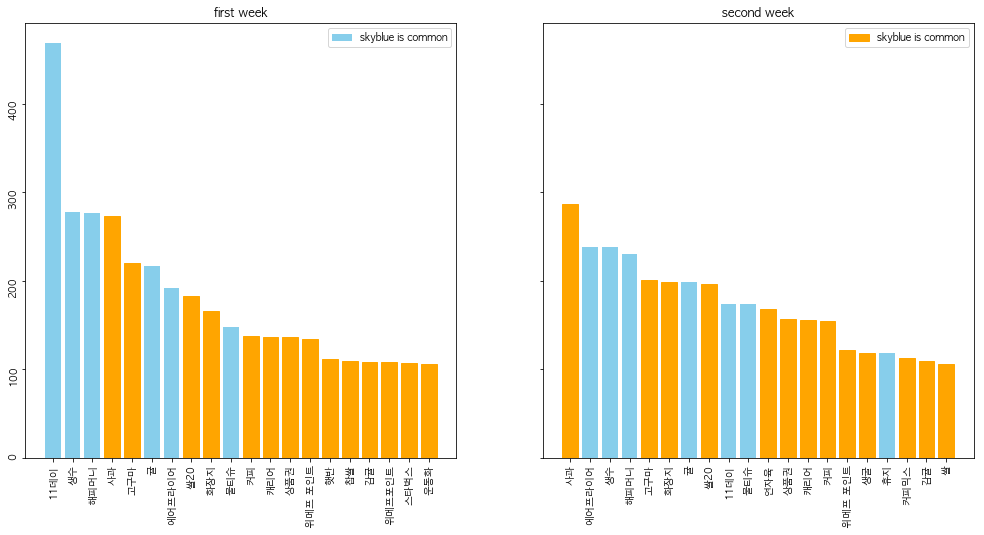

In [641]:
x[0] = text_01_60
x[1] = text_02_60
y[0] = text_01
y[1] = text_02
title = ['first week', 'second week']

fig, axes = plt.subplots(1,2, figsize = (17,8), sharey=True)

for j,ax in enumerate(axes.flatten()):
    ax.tick_params(labelrotation=90)
    ax.set_title(title[j])
    
    color_type = [i for i, x in enumerate( x[j].text[:20].isin(y[j].text[:20]) ) if x==0]
    
    barlist = ax.bar( x[j][:20].text, x[j][:20].counts, color='skyblue', label='skyblue is common')
            
    for i in range(len(color_type)):
        barlist[color_type[i]].set_color('orange')
    ax.legend(loc="upper right")

plt.show()

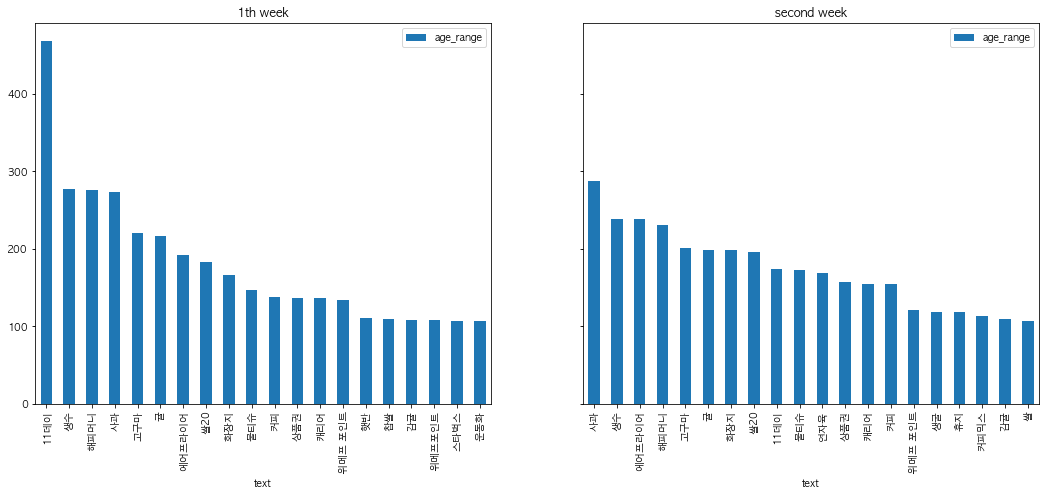

In [376]:
fig, axes = plt.subplots(1,2, figsize=(18,7), sharey=True)

data_01_refined_rd_[data_01_refined_rd_.age_range == '60+'].groupby('text').count()\
.sort_values(by='age_range', ascending=False)\
.plot(kind='bar',stacked=False , title = '1th week' , ax=axes[0])

data_02_refined_rd_[data_02_refined_rd_.age_range == '60+'].groupby('text').count()\
.sort_values(by='age_range', ascending=False)\
.plot(kind='bar',stacked=False , title='second week', ax=axes[1])

plt.show()

---

In [377]:
outer_60 = pd.merge( text_01_60, text_02_60 , on='text', how='outer')

In [378]:
outer_60 = outer_60[['text', 'rank_x', 'rank_y',  'counts_x',  'counts_y']] 

In [379]:
outer_60.head()

,text,rank_x,rank_y,counts_x,counts_y
0,11데이,1.0,9.0,468.0,174.0
1,생수,2.0,2.0,277.0,238.0
2,해피머니,3.0,4.0,276.0,230.0
3,사과,4.0,1.0,273.0,287.0
4,고구마,5.0,5.0,220.0,201.0


---

In [380]:
outer_0_60 = outer_60.copy()

In [381]:
outer_0_60.counts_x = outer_0_60.counts_x.fillna(1)

In [382]:
outer_0_60.counts_y = outer_0_60.counts_y.fillna(1)

In [383]:
text_01_60[['rank']].tail(1)

,rank
33035,15549.0


In [384]:
outer_0_60.rank_x = outer_0_60.rank_x.fillna(15549+1)

In [385]:
outer_0_60.tail()

,text,rank_x,rank_y,counts_x,counts_y
51744,버물리,15550.0,14594.0,1.0,1.0
51745,버논에어프라이어,15550.0,14594.0,1.0,1.0
51746,레코드판,15550.0,14594.0,1.0,1.0
51747,오뚜기라면,15550.0,14594.0,1.0,1.0
51748,미향,15550.0,14594.0,1.0,1.0


In [386]:
text_02_60[['rank']].tail(1)

,rank
30906,14594.0


In [387]:
outer_0_60.rank_y = outer_0_60.rank_y.fillna(14594+1)

---

In [388]:
outer_0_60['up'] =  outer_0_60.rank_x - outer_0_60.rank_y 

In [389]:
outer_0_60['increment'] = (outer_0_60.counts_y - outer_0_60.counts_x)/outer_0_60.counts_x

---

## not-null dataframe 인지 확인!

In [390]:
outer_0_60.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51749 entries, 0 to 51748
Data columns (total 7 columns):
text         51749 non-null object
rank_x       51749 non-null float64
rank_y       51749 non-null float64
counts_x     51749 non-null float64
counts_y     51749 non-null float64
up           51749 non-null float64
increment    51749 non-null float64
dtypes: float64(6), object(1)
memory usage: 3.2+ MB


In [391]:
outer_0_60[(outer_0_60.rank_y <= 50) & (outer_0_60.up > 0) ].shape

(30, 7)

## # 변동성 보기

1. 50위 이내 중, 순위 상승 검색어

In [392]:
## 둘째주 50위 이내 중, 순위 상승한 검색어! - 32개

outer_0_60[(outer_0_60.rank_y <= 50) & (outer_0_60.up > 0) ].sort_values(by = 'counts_y', ascending=False)

,text,rank_x,rank_y,counts_x,counts_y,up,increment
3,사과,4.0,1.0,273.0,287.0,3.0,0.051282
6,에어프라이어,7.0,2.0,192.0,238.0,5.0,0.239583
8,화장지,9.0,6.0,166.0,198.0,3.0,0.192771
329,연자육,317.0,11.0,29.0,168.0,306.0,4.793103
26,생굴,27.0,16.0,99.0,118.0,11.0,0.191919
21,휴지,22.0,16.0,104.0,118.0,6.0,0.134615
29,커피믹스,30.0,18.0,95.0,113.0,12.0,0.189474
33,쌀,34.0,20.0,89.0,106.0,14.0,0.191011
27,원피스,27.0,21.0,99.0,103.0,6.0,0.040404
36,두유,34.0,24.0,89.0,96.0,10.0,0.078652


---

2. 100위 이내 중, increment 20% 이상 - increment 폭 큰 순서대로

In [393]:
outer_0_60[(outer_0_60.rank_y <= 100) & (outer_0_60.increment >= 0.2)]\
        .sort_values(by ='increment',ascending = False)

,text,rank_x,rank_y,counts_x,counts_y,up,increment
12933,1+1특가,8484.0,61.0,2.0,64.0,8423.0,31.000000
2648,첫구매,2618.0,69.0,6.0,61.0,2549.0,9.166667
1926,토다이 미아점,1869.0,58.0,8.0,65.0,1811.0,7.125000
329,연자육,317.0,11.0,29.0,168.0,306.0,4.793103
519,금강제화,517.0,83.0,21.0,57.0,434.0,1.714286
354,노트북,341.0,94.0,28.0,53.0,247.0,0.892857
136,공기 청정기,136.0,31.0,48.0,85.0,105.0,0.770833
186,브라질 너트,183.0,53.0,40.0,67.0,130.0,0.675000
139,신세계상품권,140.0,40.0,47.0,76.0,100.0,0.617021
210,호박고구마,206.0,83.0,37.0,57.0,123.0,0.540541


---

---

---

# # 2. 여성 주간 전체비교

In [404]:
pd.merge( text_01, text_02 , on='text', how='inner').text.nunique() # 위랑 계산이 맞네

253317

In [405]:
outer = pd.merge( text_01, text_02 , on='text', how='outer'); outer.sort_values('counts_y', ascending=False)

,text,counts_x,rank_x,counts_y,rank_y
1,물티슈,21083.0,2.0,18601.0,1.0
0,11데이,23039.0,1.0,12797.0,2.0
4,귀걸이,12654.0,5.0,12780.0,3.0
6,에어프라이어,11705.0,7.0,12519.0,4.0
2,양말,13118.0,3.0,11636.0,5.0
5,생수,12623.0,6.0,10926.0,6.0
3,에어팟,13001.0,4.0,10722.0,7.0
10,롯데월드,10054.0,11.0,10481.0,8.0
8,귤,10474.0,9.0,9919.0,9.0
11,닭가슴살,9762.0,12.0,9712.0,10.0


In [406]:
outer.columns

Index(['text', 'counts_x', 'rank_x', 'counts_y', 'rank_y'], dtype='object')

In [407]:
 # columns 순서를 바꿔!
    
outer = outer[['text', 'rank_x', 'rank_y',  'counts_x',  'counts_y']] 

---

## # outer_0 : outer에서 NaN인 fields를 1 으로 채워준다!

In [410]:
outer_0 = outer.copy()

In [411]:
outer_0.counts_x = outer_0.counts_x.fillna(1)

In [412]:
outer_0.counts_y = outer_0.counts_y.fillna(1)

: # rank_x의 빈칸도 채워주어야 한다!

In [413]:
text_01[['rank']].tail(1)

,rank
489189,408848.0


In [414]:
outer_0.rank_x = outer_0.rank_x.fillna(408848+1)

: # rank_y의 빈칸도 채워준다.

In [415]:
text_02[['rank']].tail(1)

,rank
476018,399346.0


In [416]:
outer_0.rank_y = outer_0.rank_y.fillna(399346+1)

---

### # up / increment 변수 정의

In [417]:
outer_0['up'] =  outer_0.rank_x - outer_0.rank_y 

In [418]:
outer_0['increment'] = (outer_0.counts_y - outer_0.counts_x)/outer_0.counts_x

In [420]:
outer_0.head()

,text,rank_x,rank_y,counts_x,counts_y,up,increment
0,11데이,1.0,2.0,23039.0,12797.0,-1.0,-0.444551
1,물티슈,2.0,1.0,21083.0,18601.0,1.0,-0.117725
2,양말,3.0,5.0,13118.0,11636.0,-2.0,-0.112975
3,에어팟,4.0,7.0,13001.0,10722.0,-3.0,-0.175294
4,귀걸이,5.0,3.0,12654.0,12780.0,2.0,0.009957


---

# # 1. TopN 순위 내 변동

## # 이번주 50위를 살펴보자!

In [421]:
outer_0[outer_0.rank_y <= 50].shape

(50, 7)

In [423]:
outer_0[(outer_0.rank_y <= 50) & (outer_0.up > 0) ].shape

(28, 7)

In [422]:
 # 이번주 50위 중에 *순위가 오른 것* 들 모음! 
    
outer_0[(outer_0.rank_y <= 50) & (outer_0.up > 0) ].sort_values(by = 'counts_y', ascending=False)  

# outer_0[(outer_0.rank_y <= 50) & (outer_0.up > 0) ].shape[0] = 31

,text,rank_x,rank_y,counts_x,counts_y,up,increment
1,물티슈,2.0,1.0,21083.0,18601.0,1.0,-0.117725
4,귀걸이,5.0,3.0,12654.0,12780.0,2.0,0.009957
6,에어프라이어,7.0,4.0,11705.0,12519.0,3.0,0.069543
10,롯데월드,11.0,8.0,10054.0,10481.0,3.0,0.042471
11,닭가슴살,12.0,10.0,9762.0,9712.0,2.0,-0.005122
13,아이폰 케이스,14.0,11.0,9350.0,9468.0,3.0,0.012620
40,마스크,41.0,12.0,5684.0,9460.0,29.0,0.664321
15,원피스,16.0,13.0,9106.0,9439.0,3.0,0.036569
16,샴푸,17.0,16.0,9103.0,8149.0,1.0,-0.104801
18,휴지,19.0,17.0,8678.0,8065.0,2.0,-0.070638


### # 200위, 500위내에서 변동 20% 이상인 keywords

In [427]:
outer_0[(outer_0.rank_y <= 200) & (outer_0.increment >= 0.2)].sort_values(by = 'increment', ascending = False)

,text,rank_x,rank_y,counts_x,counts_y,up,increment
35407,투움바,34348.0,146.0,24.0,2842.0,34202.0,117.416667
19510,1+1특가,19264.0,68.0,49.0,4224.0,19196.0,85.204082
13385,투움바파스타,13321.0,108.0,76.0,3347.0,13213.0,43.039474
1526,미세먼지 마스크,1523.0,50.0,663.0,4988.0,1473.0,6.523379
1595,황사 마스크,1590.0,88.0,639.0,3848.0,1502.0,5.021909
1937,연자육,1936.0,177.0,544.0,2604.0,1759.0,3.786765
590,아웃백,591.0,32.0,1335.0,6355.0,559.0,3.760300
504,공기 청정기,504.0,102.0,1475.0,3529.0,402.0,1.392542
505,아동한복,506.0,138.0,1474.0,2913.0,368.0,0.976255
176,더페이스샵,177.0,44.0,2711.0,5250.0,133.0,0.936555


In [425]:
outer_0[(outer_0.rank_y <= 500) & (outer_0.increment >= 0.2)].sort_values(by = 'increment', ascending = False)

,text,rank_x,rank_y,counts_x,counts_y,up,increment
489190,슈퍼특가데이,408849.0,446.0,1.0,1528.0,408403.0,1527.000000
35407,투움바,34348.0,146.0,24.0,2842.0,34202.0,117.416667
19510,1+1특가,19264.0,68.0,49.0,4224.0,19196.0,85.204082
13385,투움바파스타,13321.0,108.0,76.0,3347.0,13213.0,43.039474
6307,미세먼지마스크 kf94,6290.0,377.0,178.0,1646.0,5913.0,8.247191
1526,미세먼지 마스크,1523.0,50.0,663.0,4988.0,1473.0,6.523379
1595,황사 마스크,1590.0,88.0,639.0,3848.0,1502.0,5.021909
4201,황사마스크,4193.0,479.0,270.0,1458.0,3714.0,4.400000
1937,연자육,1936.0,177.0,544.0,2604.0,1759.0,3.786765
590,아웃백,591.0,32.0,1335.0,6355.0,559.0,3.760300


# ---------------------------------------------------------------------------- 일단여기까지

## # * 2주차에 새로 등장한 검색어!!

이런 애들을 어떻게 해석 할 수 있을까?<br/><br/>
<u>: 이번주에 특가 딜이 있었던 상품들?

In [76]:
outer_0[outer_0.counts_x <= 1] ## counts<=1 인것들은, NaN값들에서 치환된거야!

,text,rank_x,rank_y,counts_x,counts_y,up,increment
408847,스타벅스 더블샷 에스프레소,408848.0,NaN,1.0,1.0,NaN,0.0
408848,장흥관자,408849.0,NaN,1.0,1.0,NaN,0.0
408849,알러지침구,408850.0,NaN,1.0,1.0,NaN,0.0
408850,라운드랩 독도스킨,408851.0,NaN,1.0,1.0,NaN,0.0
408851,신년 파티용품,408852.0,306385.0,1.0,2.0,102467.0,1.0
408852,11데이 주걱,408853.0,NaN,1.0,1.0,NaN,0.0
408853,앚타밀,408854.0,467624.0,1.0,1.0,-58770.0,0.0
408854,11데이 컴퓨터,408855.0,97728.0,1.0,6.0,311127.0,5.0
408855,스노우파그,408856.0,NaN,1.0,1.0,NaN,0.0
408856,겨울목토시,408857.0,175763.0,1.0,3.0,233094.0,2.0


# * 일단 여기까지 전체 !!!   ------------------------

---